### Bibliotecas

In [1]:
from src.functions_prep import *

import numpy as np
import pandas as pd
import pywt
import seaborn as sns
sns.set(font_scale=1,
        rc={'axes.labelsize':12, 'axes.labelcolor':'black', 'axes.titlecolor':'black', 'axes.titlesize':18,
            'text.color':'black', 'xtick.labelsize':10, 'xtick.color':'black', 'ytick.labelsize':10,
            'ytick.color': 'black','legend.fontsize':12, 'font.family':['serif'], 'axes.grid':False,
            'font.serif':['Times New Roman'], 'axes.facecolor':'white', 'axes.edgecolor':'black', 'axes.linewidth':0.5})
sns.set_style("ticks")
import matplotlib.pyplot as plt
plt.rc('figure', dpi=100, labelsize=12, titlesize=18)
plt.rc('axes' , labelsize=12, labelcolor='black', titlecolor='black', titlesize=18)
plt.rc('xtick', labelsize=10, color='black')
plt.rc('ytick', labelsize=10, color='black')
plt.rc('legend', fontsize=12)
plt.rc('font', family='serif', serif='Times New Roman')
plt.rc('text', color='black')
plt.rc('savefig', dpi=600, format='png')
plt.rc('grid', color='gray', linewidth=0.5, linestyle='--')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Pré-processamento

#### Carregamento

In [2]:
data = pd.read_csv('datasets/EEG_segments.csv')
channels_name = {i: data.columns[5:][i] for i in range(0, len(data.columns[5:]))}
print(data.columns)
data

Index(['subject_id', 'group', 'time', 'condition', 'trial', 'F7', 'F3', 'Fz',
       'F4', 'F8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'F5', 'F1', 'F2', 'F6', 'P5',
       'P1', 'P2', 'P6'],
      dtype='object')


,subject_id,group,time,condition,trial,F7,F3,Fz,F4,F8,...,P4,P8,F5,F1,F2,F6,P5,P1,P2,P6
0,5,gifted,0,Stimulus/1_0_R,0,1.531378,-0.864502,-3.019491,-8.649943,-3.445179,...,0.676880,-0.463145,1.278696,-1.512275,-5.919595,-9.407800,5.145280,3.957370,0.368522,-6.198436
1,5,gifted,1,Stimulus/1_0_R,0,1.418398,-1.190203,-3.305625,-8.765212,-3.603473,...,0.831420,-0.480658,1.187730,-1.865866,-6.112168,-9.667360,4.837875,4.360326,0.696908,-6.517399
2,5,gifted,2,Stimulus/1_0_R,0,1.225550,-1.514570,-3.544390,-8.785656,-3.768610,...,0.998930,-0.534284,1.044089,-2.180328,-6.245769,-9.823950,4.514731,4.786357,1.073483,-6.806452
3,5,gifted,3,Stimulus/1_0_R,0,0.965234,-1.822871,-3.732121,-8.715771,-3.931357,...,1.170623,-0.628147,0.854117,-2.447270,-6.320688,-9.877998,4.180701,5.231835,1.492637,-7.070691
4,5,gifted,4,Stimulus/1_0_R,0,0.652853,-2.100372,-3.867262,-8.562803,-4.082863,...,1.337326,-0.765499,0.626810,-2.660569,-6.338295,-9.833379,3.840865,5.691689,1.947676,-7.316648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030180,39,control,1496,Stimulus/5_50,2684,-2.367790,7.236872,8.266024,8.265323,-7.497129,...,-4.010551,-8.778322,0.468700,8.030431,8.819487,6.684566,-0.495104,4.890201,3.859909,-7.586525
4030181,39,control,1497,Stimulus/5_50,2684,-2.793466,7.788224,8.303879,8.369090,-8.089692,...,-4.427427,-8.636727,0.642168,8.126723,8.884315,6.694110,-0.118441,5.369326,3.088578,-7.814672
4030182,39,control,1498,Stimulus/5_50,2684,-3.325082,8.268629,8.312572,8.436926,-8.623169,...,-4.877942,-8.446591,0.797519,8.192908,8.900485,6.686771,0.206419,5.845345,2.328427,-7.982903
4030183,39,control,1499,Stimulus/5_50,2684,-3.945237,8.663923,8.294155,8.468505,-9.079613,...,-5.345295,-8.230225,0.928875,8.230679,8.870294,6.665401,0.467391,6.311281,1.595507,-8.100121


<Figure size 640x480 with 0 Axes>

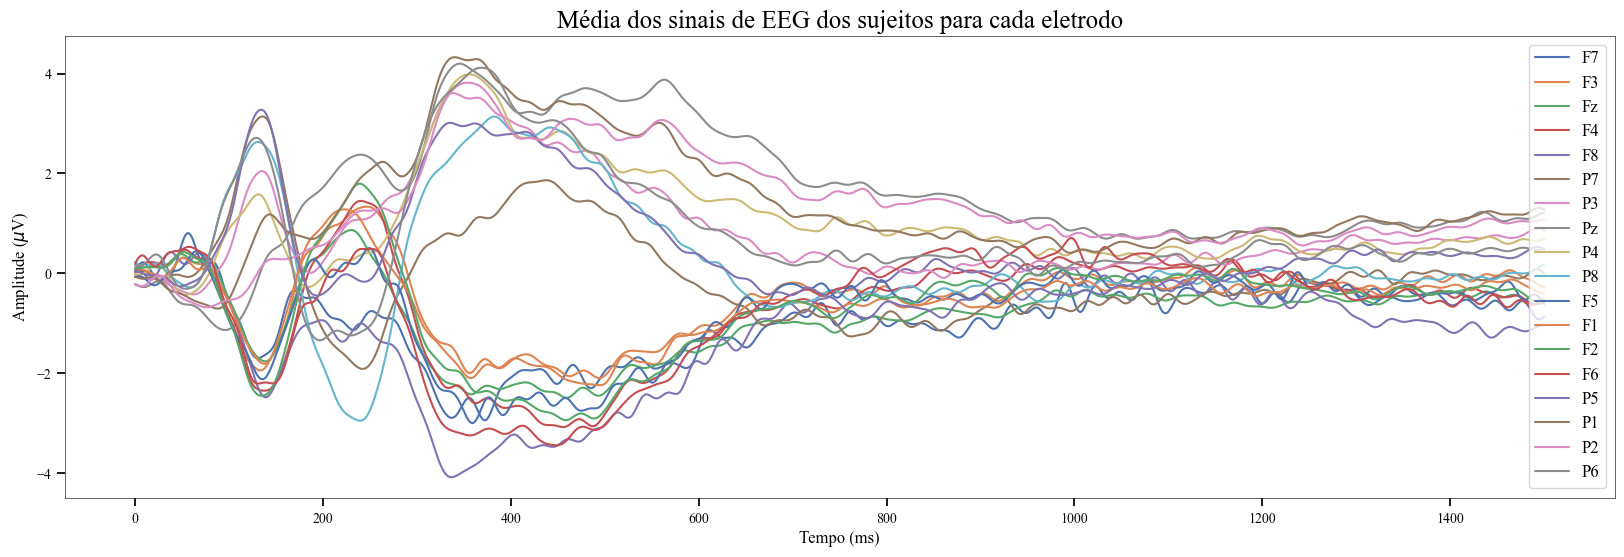

In [3]:
plt.clf()
fig1 = plt.figure(figsize=(20, 6))
for col in channels_name.values():
    average = data[col].groupby(data['time']).mean()
    plt.plot(data['time'][data['trial'] == 0], average)
plt.legend(channels_name.values())
plt.title('Média dos sinais de EEG dos sujeitos para cada eletrodo')
plt.xlabel('Tempo (ms)')
plt.ylabel(f"Amplitude ("+r"$\mu$"+"V)")
plt.show()
fig1.savefig('outputs_fig/fig1_media_sinais.png')

#### Transformações

In [4]:
# Transformar as features para o formato [trial, signal, channel]
n_trials = len(data['trial'].unique())
n_signals = len(data['time'].unique())
n_channels = len(channels_name)

signals = data.groupby('trial')[[i for i in channels_name.values()]]
signals = np.array([i[1].values for i in signals])

groups = np.array([i[0] for i in data.groupby('trial')['group'].unique().values])
# transformar dados categóricos em numericos binários
# GIFTED = 1, CONTROL = 0
groups = data_cat_for_num(groups)

del data
signals.shape, groups.shape

((2685, 1501, 18), (2685,))

#### Características (Wavelets)

Para este experimento, foram utilizadas as seguintes características:

*   DWT (Discrete Wavelet Transform)
*   Daubechies 4
*   6 níveis de decomposição

<Figure size 640x480 with 0 Axes>

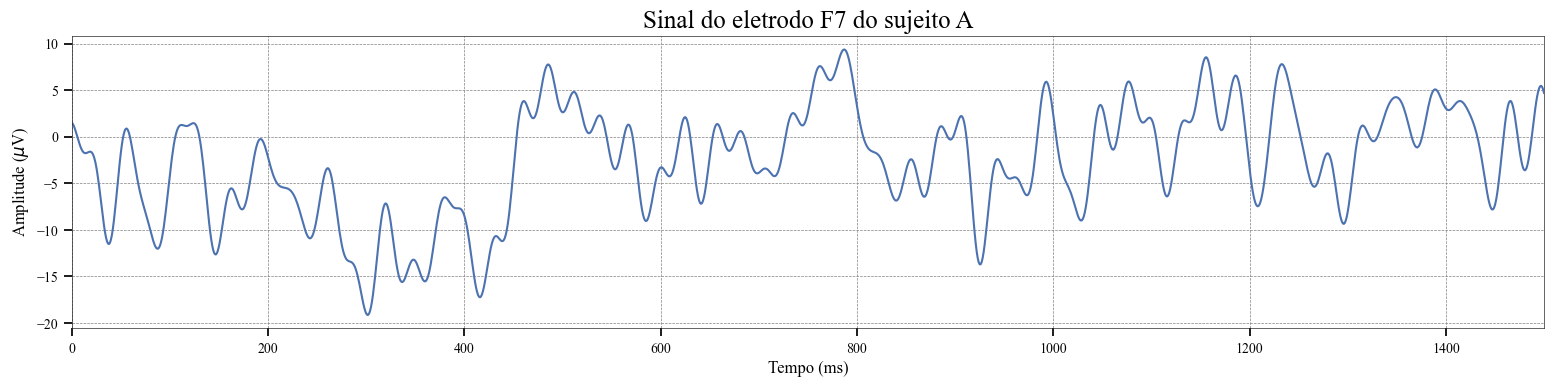

<Figure size 640x480 with 0 Axes>

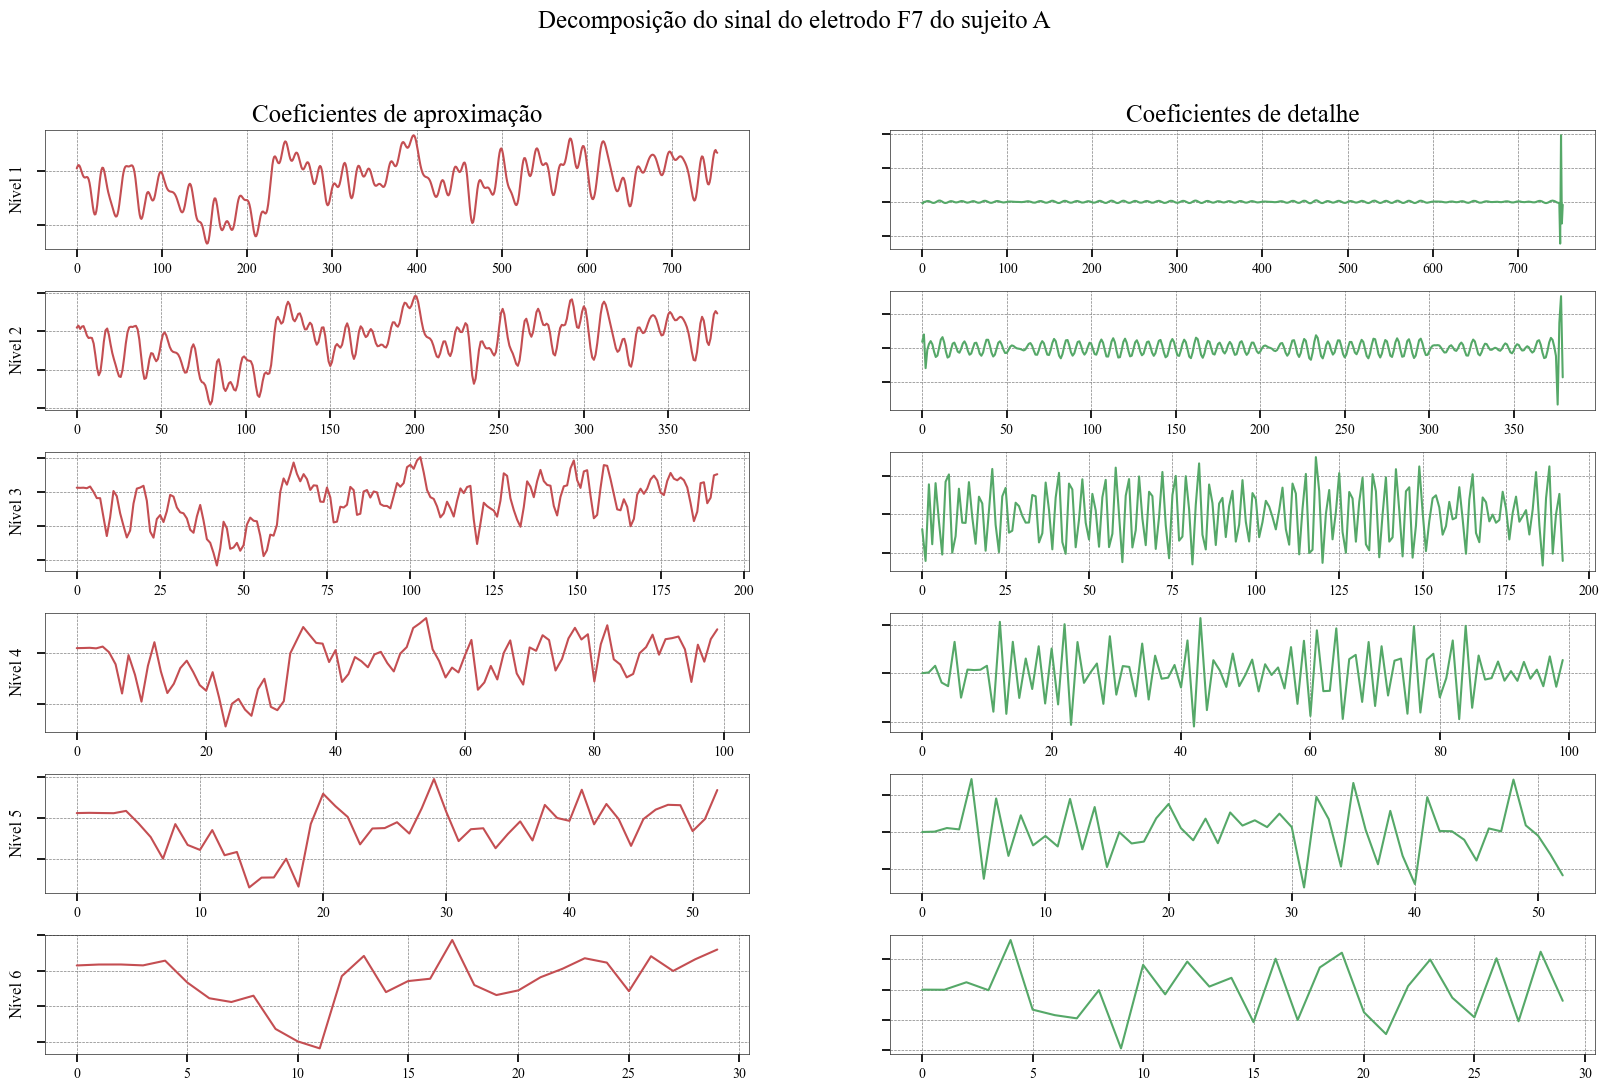

In [5]:
# Wavelet
wavelet_type = 'db4' # Daubechies (db4)
                     # Reverse biorthogonal (rbio)
                     # Biorthogonal (bior),
                     # Discrete Meyer (dmey)
                     # Symlets (sym10)
                     # Coiflets (coif4)
                     # Haar (Haar)
level = 6
idx_f7 = list(channels_name.values()).index('F7')
data_0_f7 = [x[idx_f7] for x in signals[0]]

# Plot do sinal do canal F7 do trial 0
plt.clf()
fig2 = plt.figure(figsize=(19, 4))
plt.plot(data_0_f7)
plt.title('Sinal do eletrodo F7 do sujeito A')
plt.xlabel('Tempo (ms)')
plt.ylabel(f"Amplitude ("+r"$\mu$"+"V)")
plt.xlim(0, 1500)
plt.grid(True)
plt.subplots_adjust(bottom=0.15)
plt.show()
fig2.savefig('outputs_fig/fig2_sinal_unico_0F7.png')

# Decomposição do canal F7 do trial 0
plt.clf()
fig3, ax = plt.subplots(nrows=6, ncols=2, figsize=(20,12))
fig3.suptitle('Decomposição do sinal do eletrodo F7 do sujeito A')
x = data_0_f7
for i in range(level):
    (x, coeff_d) = pywt.dwt(x, wavelet_type)
    ax[i, 0].plot(x, 'r')
    ax[i, 1].plot(coeff_d, 'g')
    ax[i, 0].set_ylabel("Nível {}".format(i + 1), rotation=90)
    ax[i, 0].set_yticklabels([])
    if i == 0:
        ax[i, 0].set_title("Coeficientes de aproximação")
        ax[i, 1].set_title("Coeficientes de detalhe")
    ax[i, 1].set_yticklabels([])
    ax[i, 0].grid(True)
    ax[i, 1].grid(True)
fig3.subplots_adjust(hspace=0.35)
plt.show()
fig3.savefig('outputs_fig/fig3_decomposicao_0F7_db4_6l.png')

Após a decomposição, reguraliza-se os 6 vetores de decomposição e o último vetor de aproximação com a norma L2, obtendo-se 7 características para cada eletrodo de cada registro.

In [6]:
features = []
for i in range(signals.shape[0]):
    # Decompor todos os sinais de cada channel e trial retornando como features a norma L2 dos sinais gerados
    # em cada um dos seis níveis de decomposição, mais a norma dos sinais restante no coeficiente de aproximação.
    signal_feat = get_eeg_features(signals[i], wavelet_type, level)
    features.append(signal_feat)

features = np.array(features)

#### Outliers

APÓS ALGUNS TESTES FOI DECIDIDO NÃO EXECUTAR ESTA ETAPA DE REMOÇÃO DE OUTLIERS, POIS ASSIM PODERIA SUPERAJUSTAR OS MODELOS, PORÉM ABAIXO TEMOS ESTA ETAPA SERIA EXECUTADA.

<Figure size 640x480 with 0 Axes>

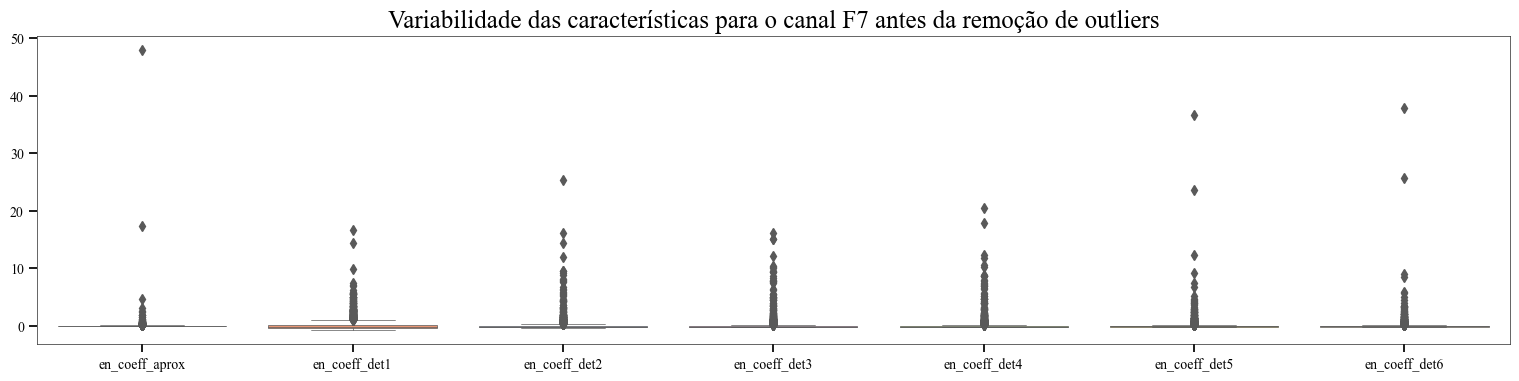

<Figure size 640x480 with 0 Axes>

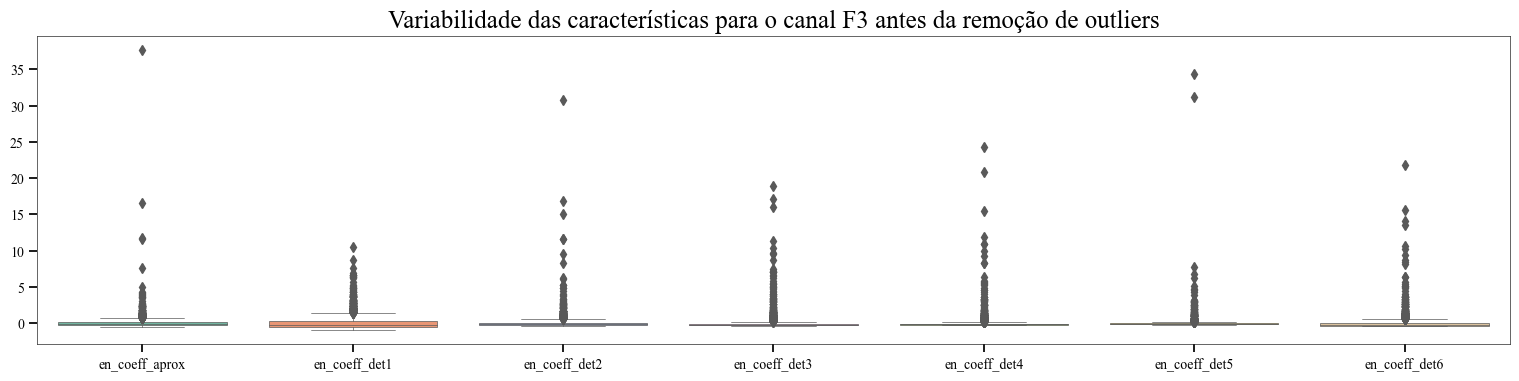

<Figure size 640x480 with 0 Axes>

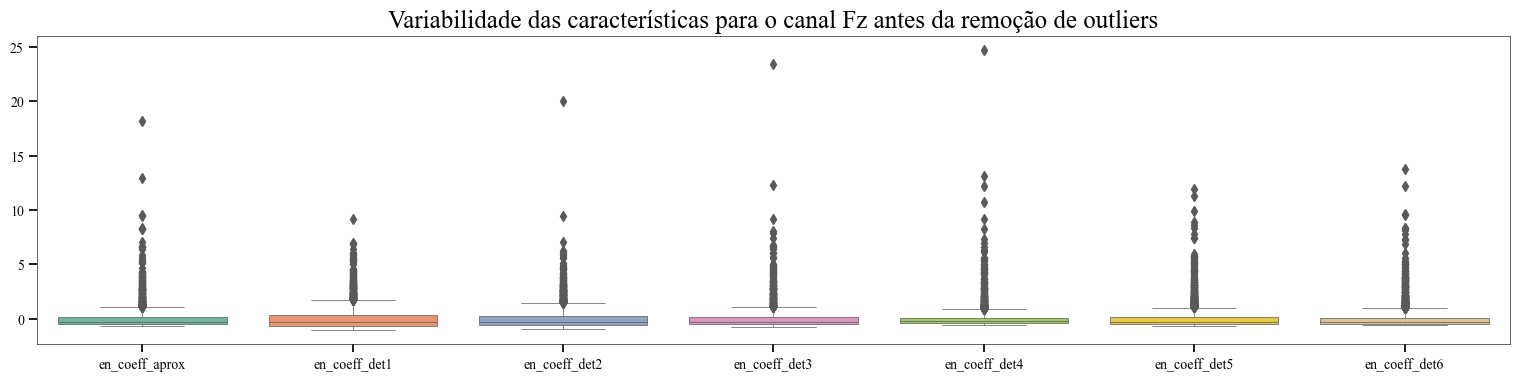

<Figure size 640x480 with 0 Axes>

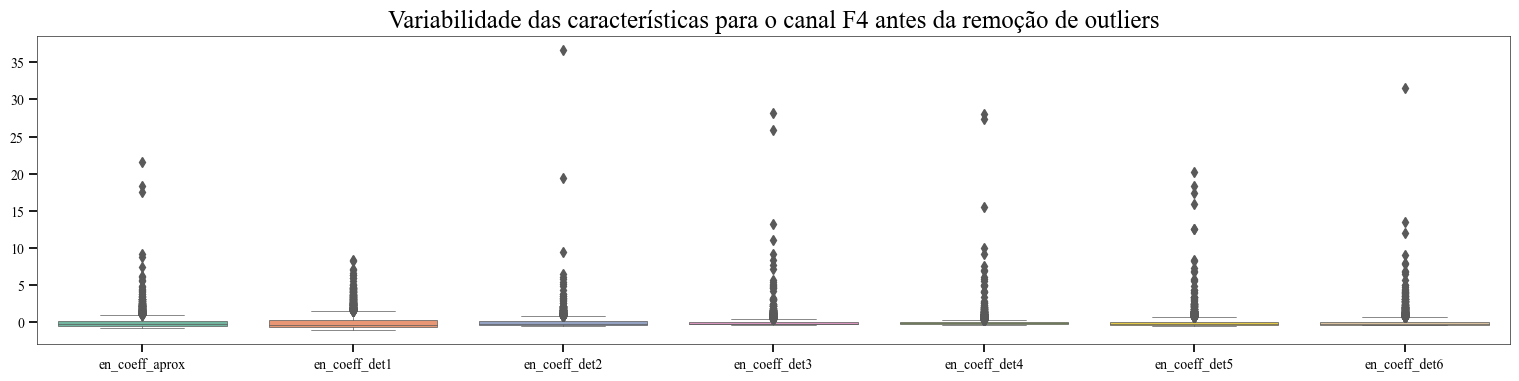

<Figure size 640x480 with 0 Axes>

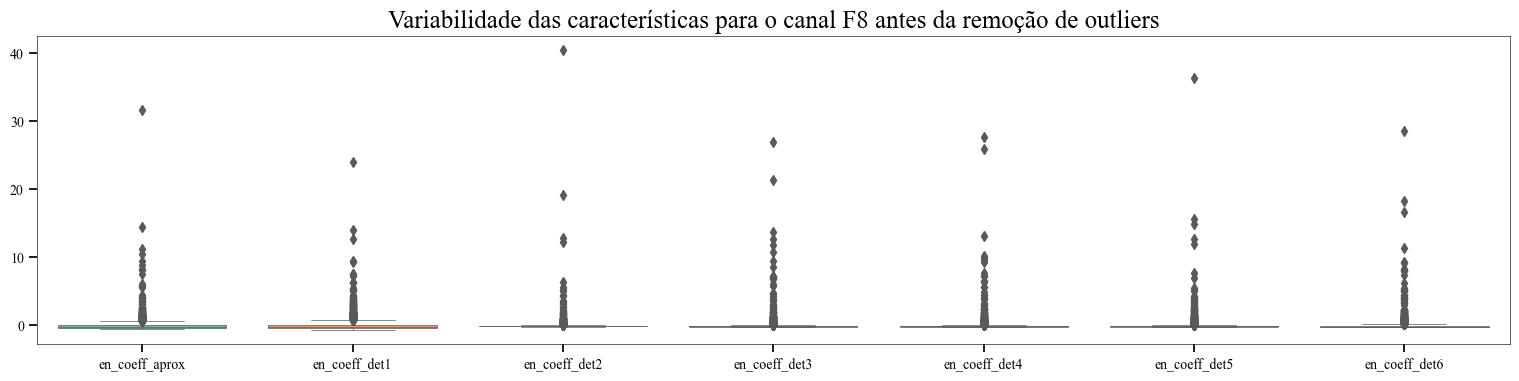

<Figure size 640x480 with 0 Axes>

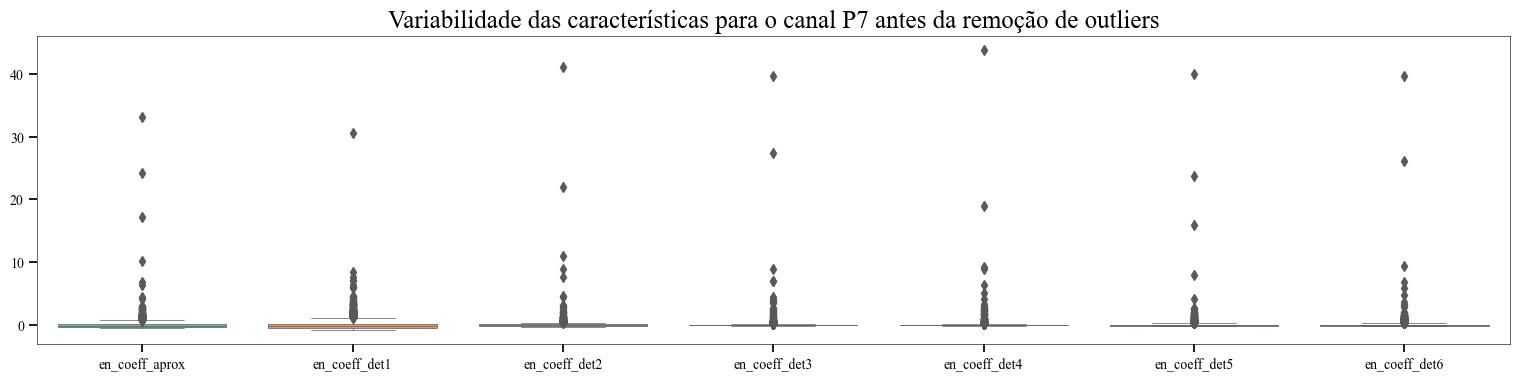

<Figure size 640x480 with 0 Axes>

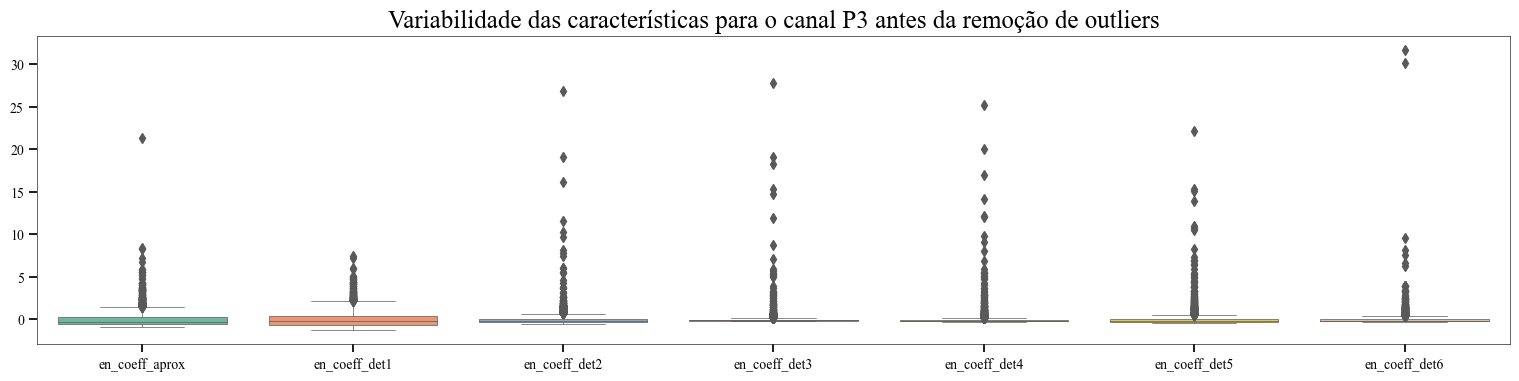

<Figure size 640x480 with 0 Axes>

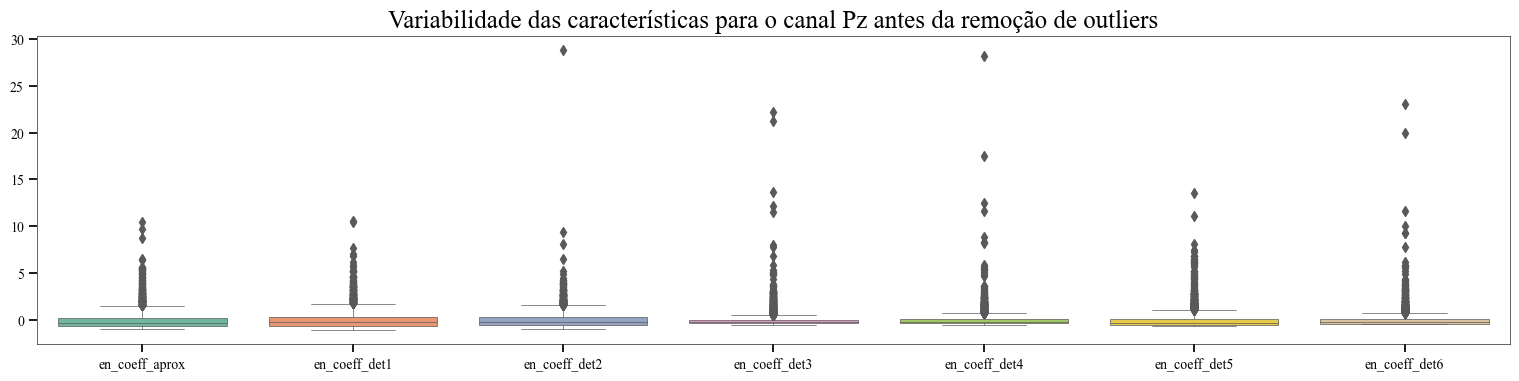

<Figure size 640x480 with 0 Axes>

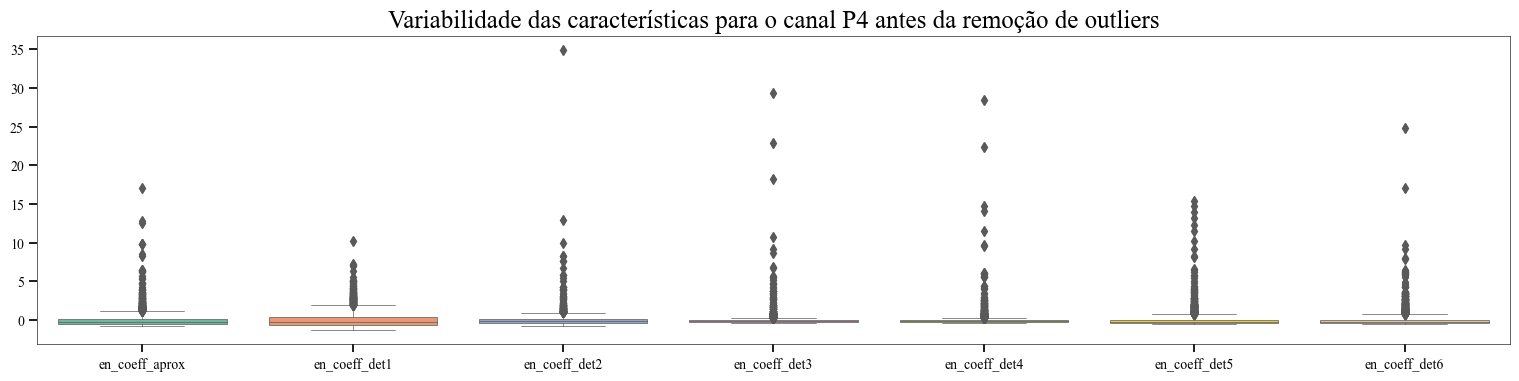

<Figure size 640x480 with 0 Axes>

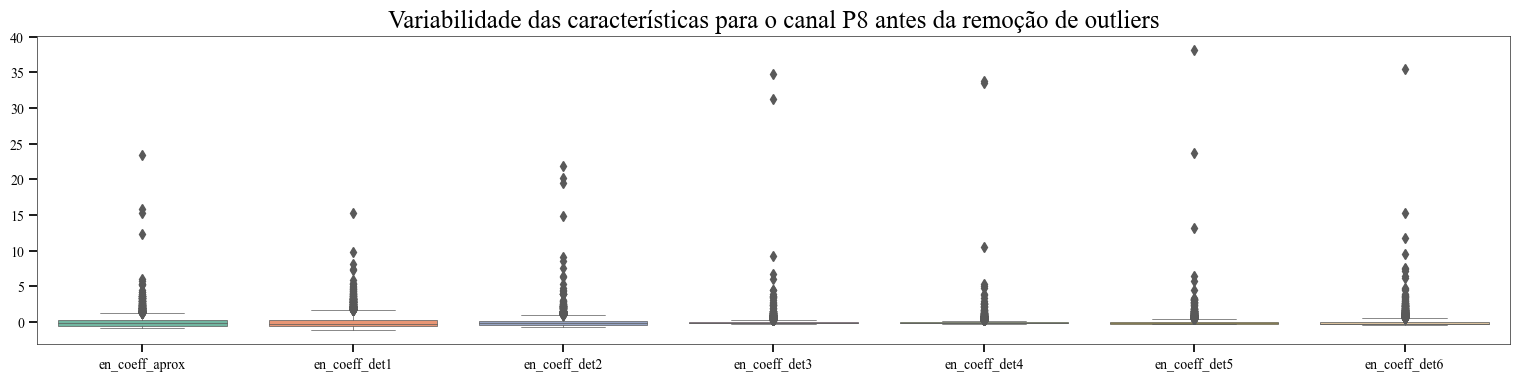

<Figure size 640x480 with 0 Axes>

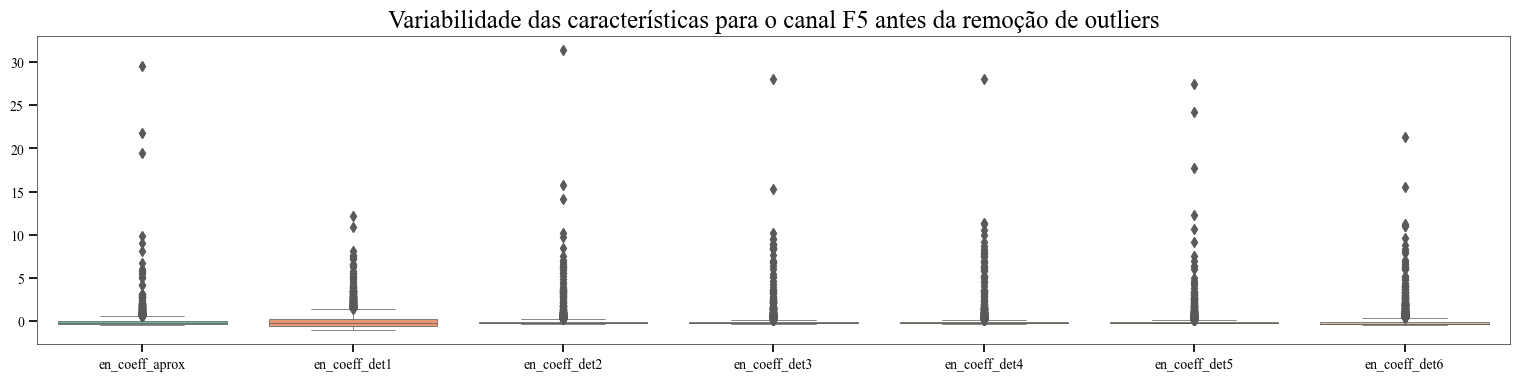

<Figure size 640x480 with 0 Axes>

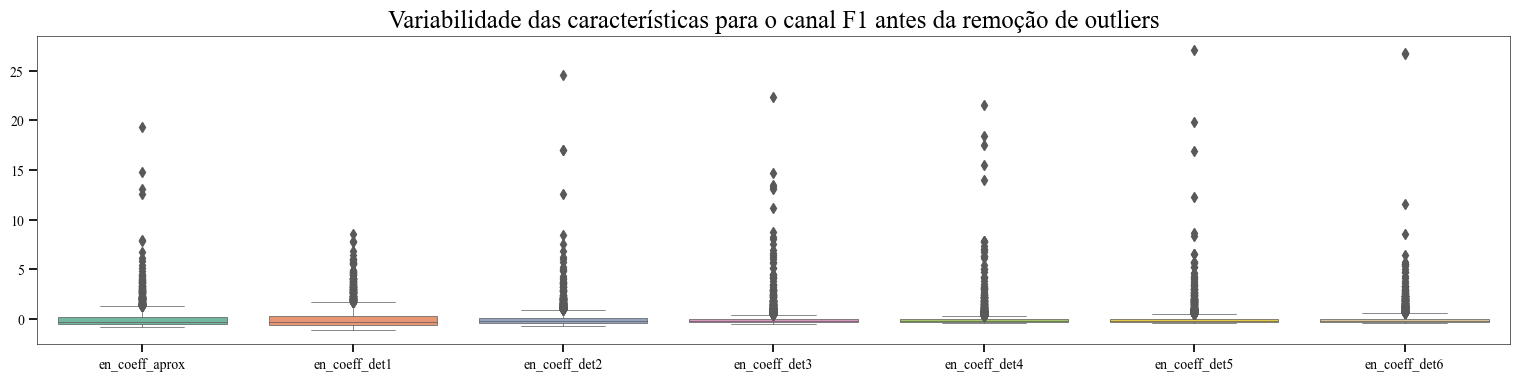

<Figure size 640x480 with 0 Axes>

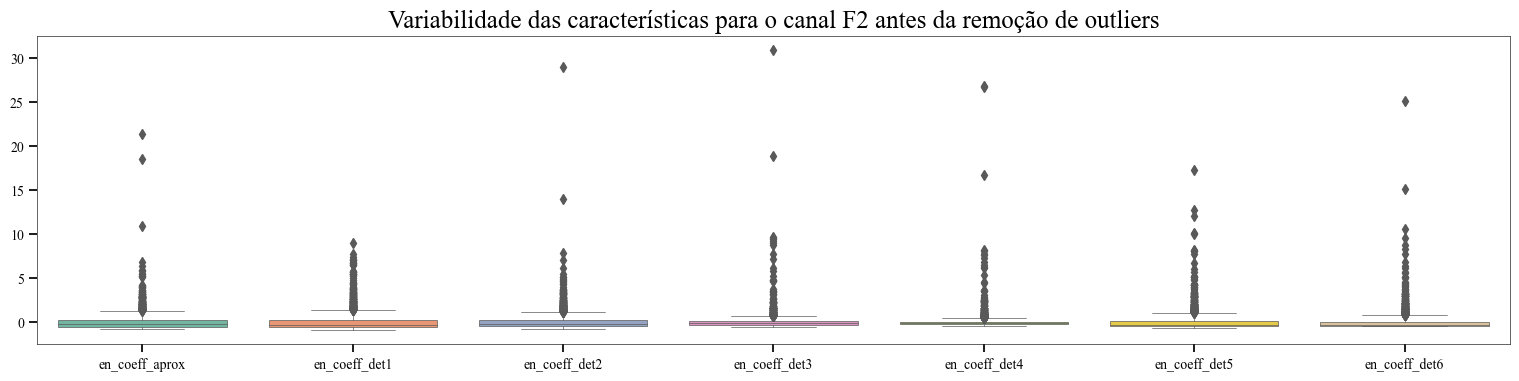

<Figure size 640x480 with 0 Axes>

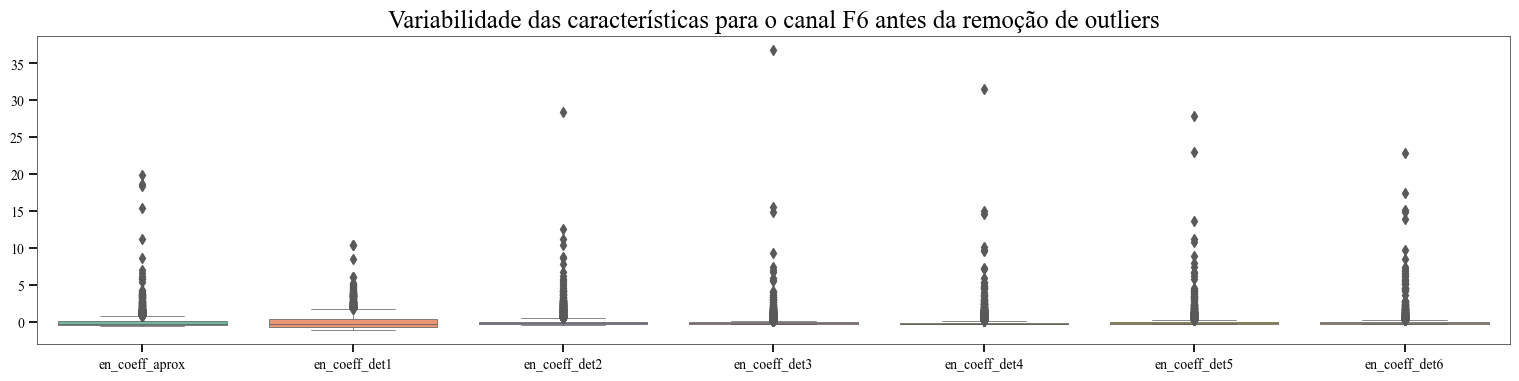

<Figure size 640x480 with 0 Axes>

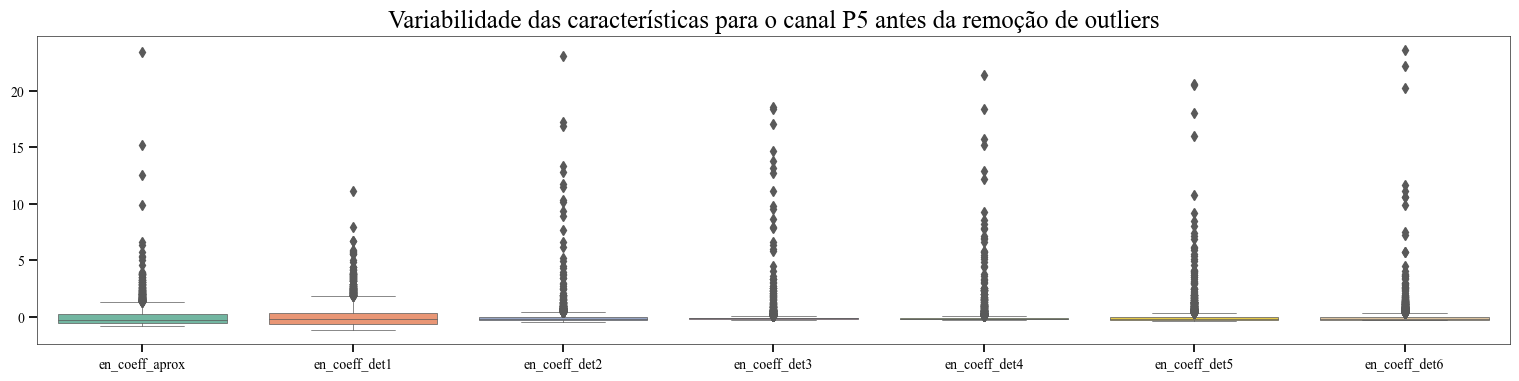

<Figure size 640x480 with 0 Axes>

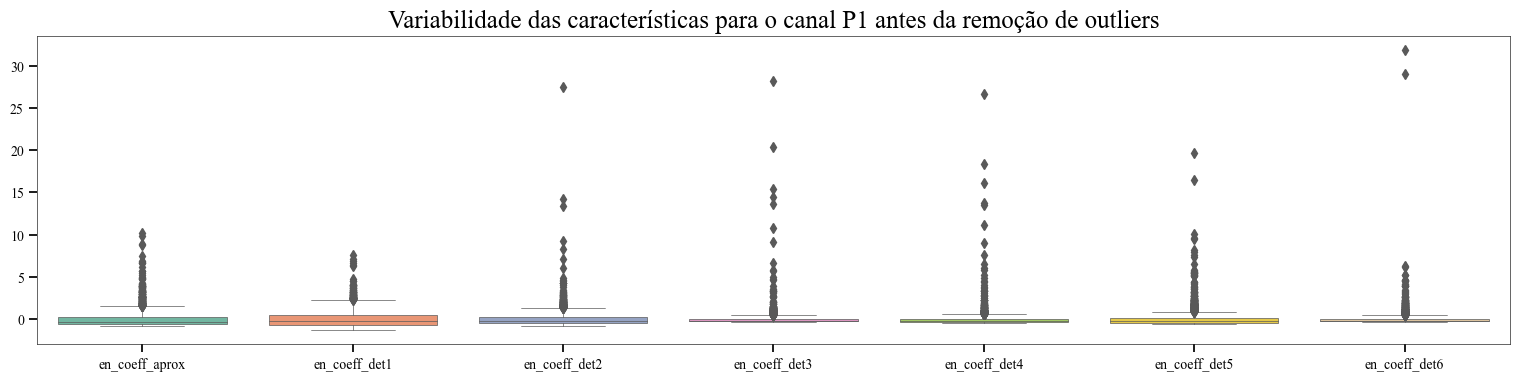

<Figure size 640x480 with 0 Axes>

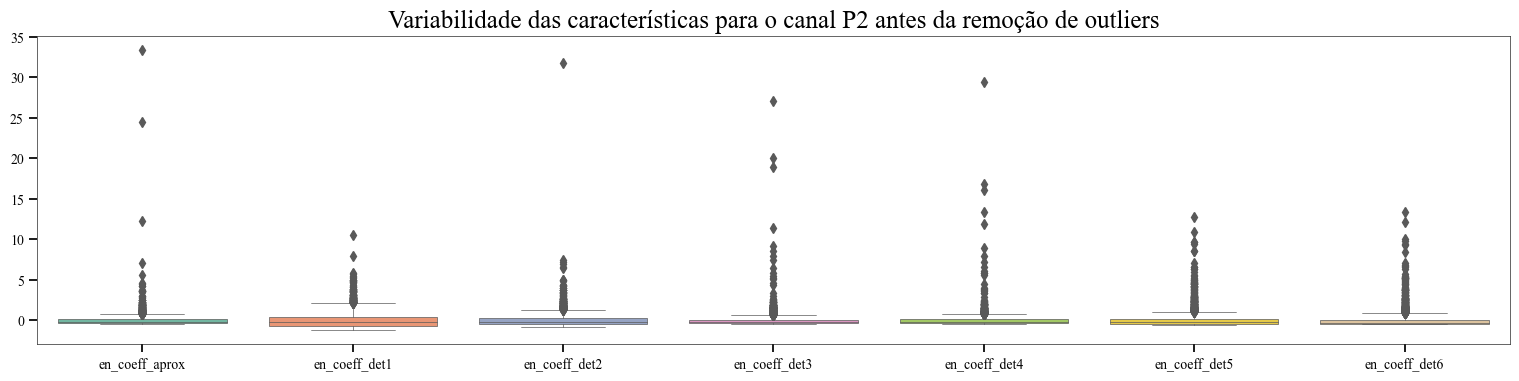

<Figure size 640x480 with 0 Axes>

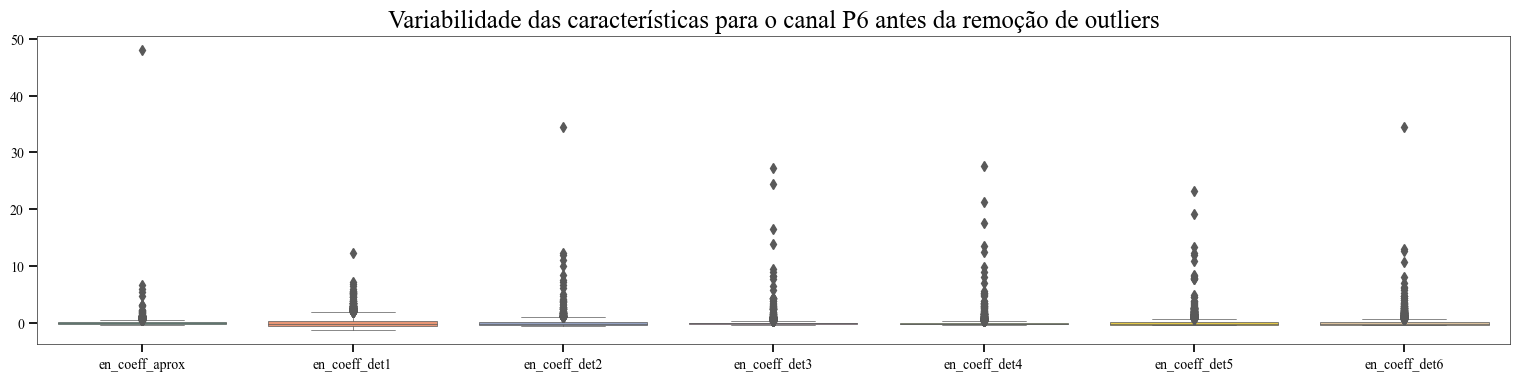

In [7]:
# Corrigir escala dos dados
features_scaler = features
scaler = StandardScaler()
wavelet_cols = ['en_coeff_aprox']+['en_coeff_det{}'.format(i) for i in range(1, level+1)]

for channel in range(features.shape[2]):
    for col in wavelet_cols:
        df = pd.DataFrame(features[:, :, channel], columns=wavelet_cols)
        features_scaler[:, :, channel] = scaler.fit_transform(df)

# Visualizando outliers para cada canal
for channel in range(features_scaler.shape[2]):
    df = pd.DataFrame(features_scaler[:, :, channel], columns=wavelet_cols)
    plt.clf()
    fig4 = plt.figure(figsize=(19, 4))
    sns.boxplot(data=df, orient="v", palette="Set2", linewidth=0.5)
    plt.title('Variabilidade das características para o canal {} antes da remoção de outliers'.format(channels_name[channel]))
    plt.show()
    fig4.savefig('outputs_fig/fig4_boxplot_antes_{}.png'.format(channels_name[channel]))

In [8]:
# Removendo prováveis outliers
print(f'Old Shape: {features_scaler.shape}')

mask_del = []
for channel in range(features_scaler.shape[2]):
    df = pd.DataFrame(features_scaler[:, :, channel], columns=wavelet_cols)
    for col in wavelet_cols:
        # Método Tukey
        # outliers_prob, outliers_poss = tukeys(df, col)
        # Método Z-score
        outliers_prob = z_score(df, col)

        mask_del = np.unique(np.concatenate((mask_del, outliers_prob))).astype(int)

features_no = np.delete(features_scaler, mask_del, axis=0)
groups_no = np.delete(groups, mask_del, axis=0)

print(f'New Shape: {features_no.shape}')

Old Shape: (2685, 7, 18)
New Shape: (1814, 7, 18)


<Figure size 640x480 with 0 Axes>

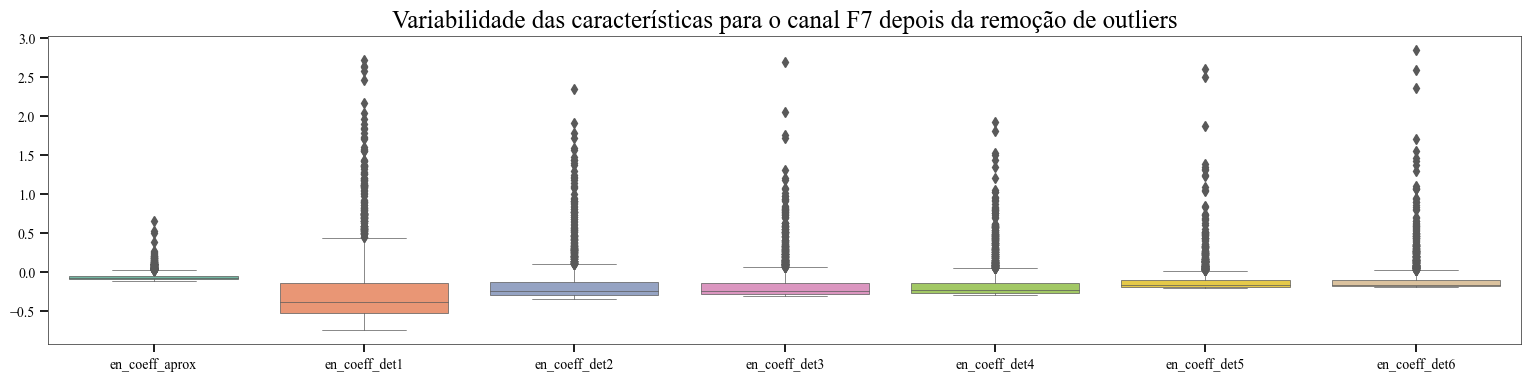

<Figure size 640x480 with 0 Axes>

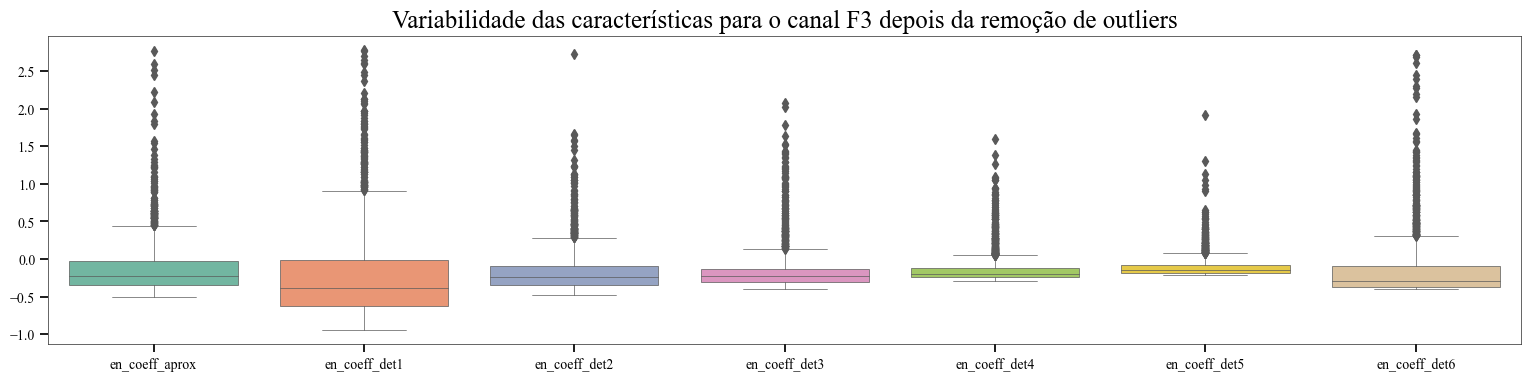

<Figure size 640x480 with 0 Axes>

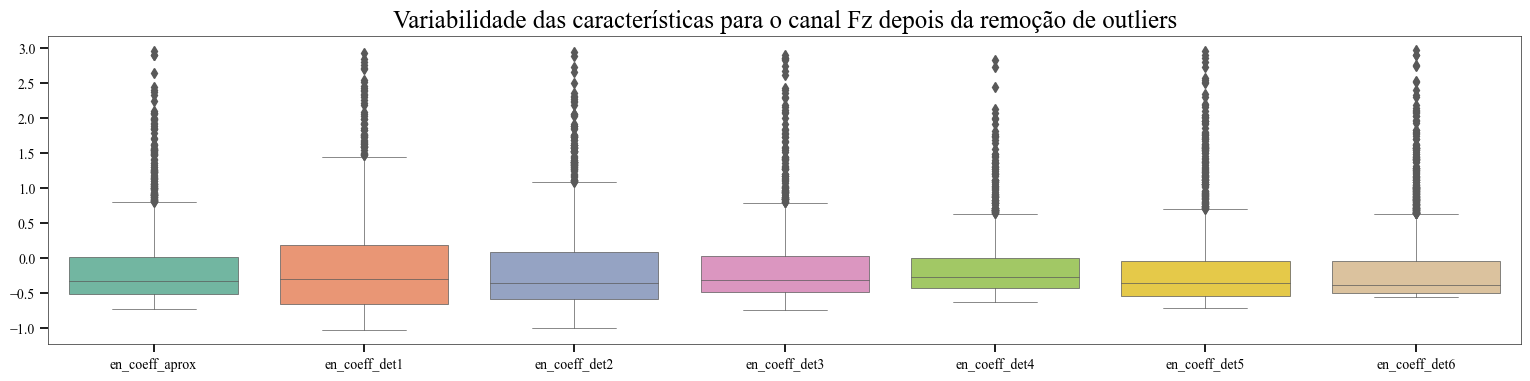

<Figure size 640x480 with 0 Axes>

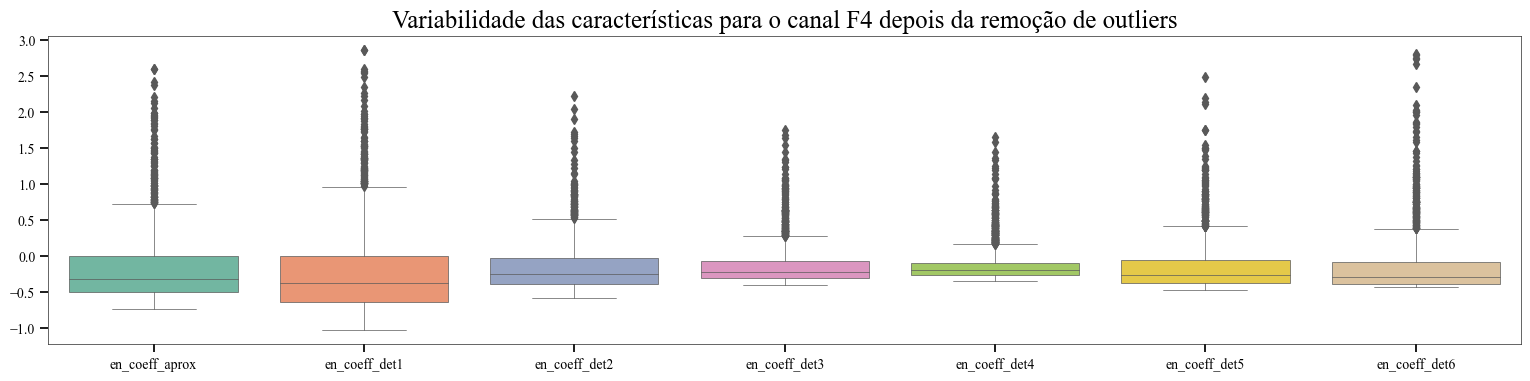

<Figure size 640x480 with 0 Axes>

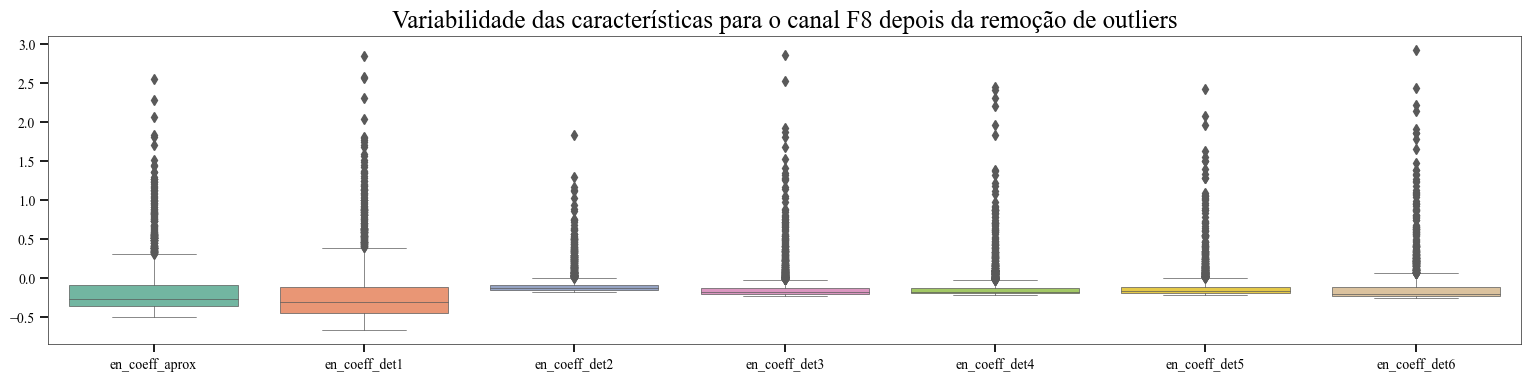

<Figure size 640x480 with 0 Axes>

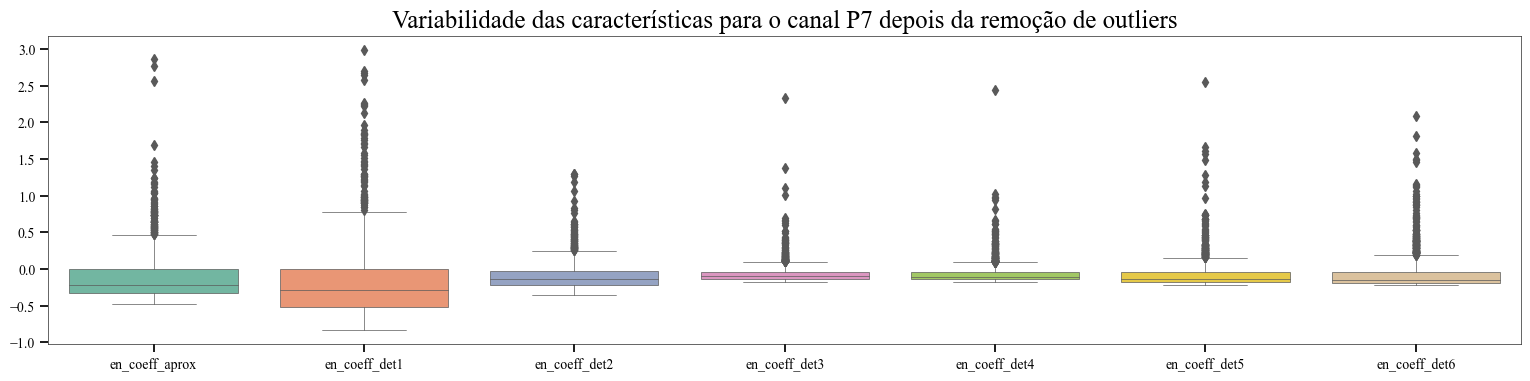

<Figure size 640x480 with 0 Axes>

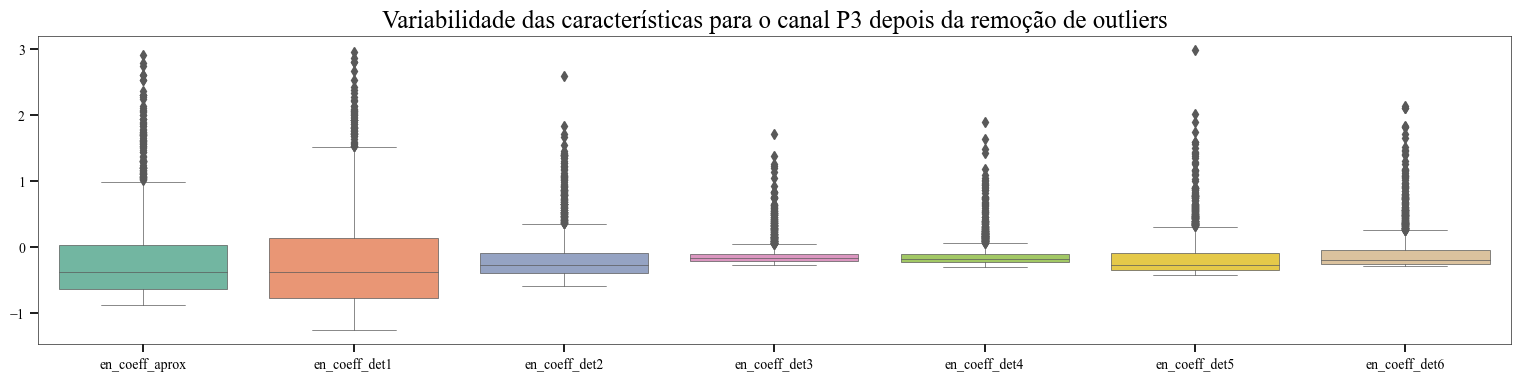

<Figure size 640x480 with 0 Axes>

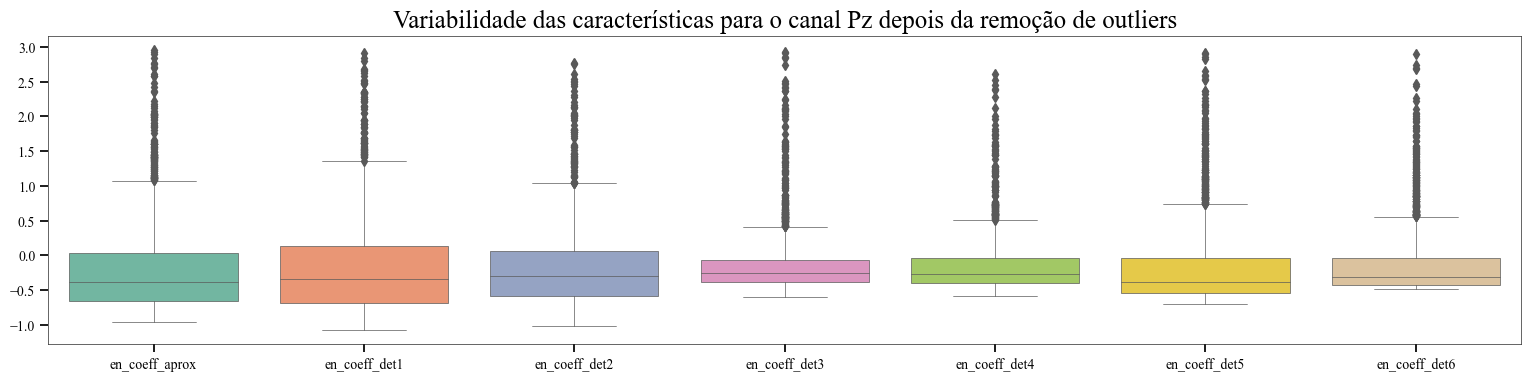

<Figure size 640x480 with 0 Axes>

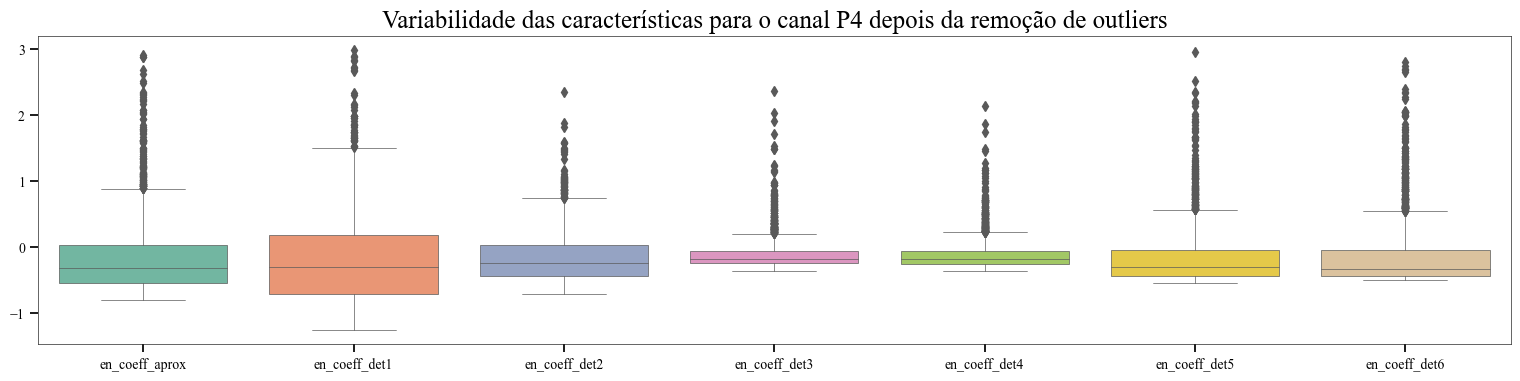

<Figure size 640x480 with 0 Axes>

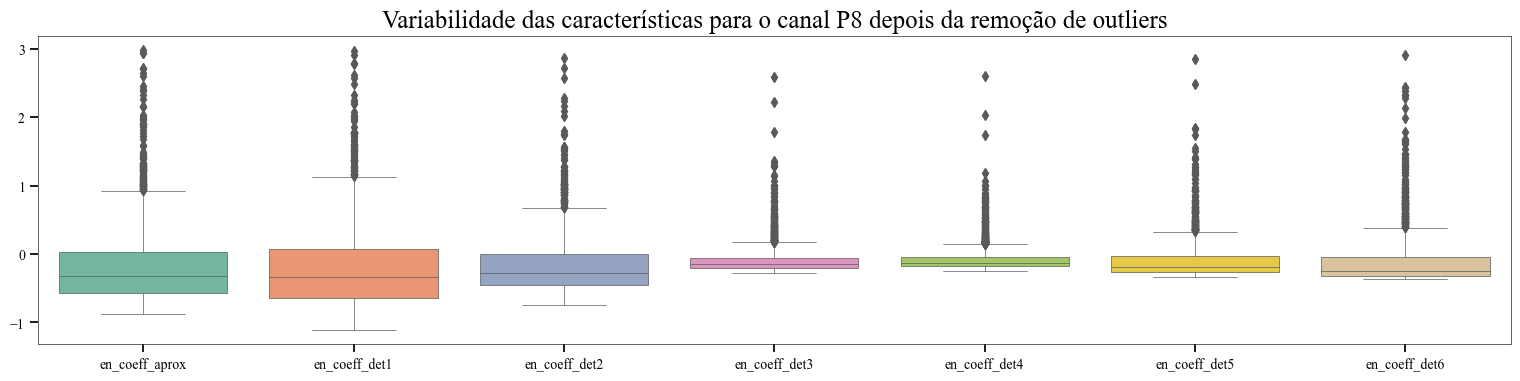

<Figure size 640x480 with 0 Axes>

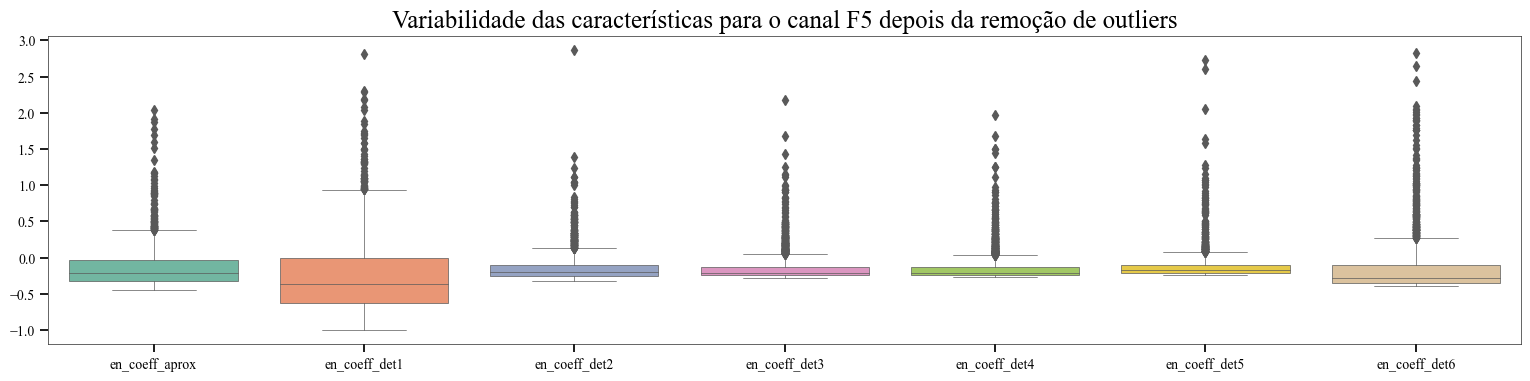

<Figure size 640x480 with 0 Axes>

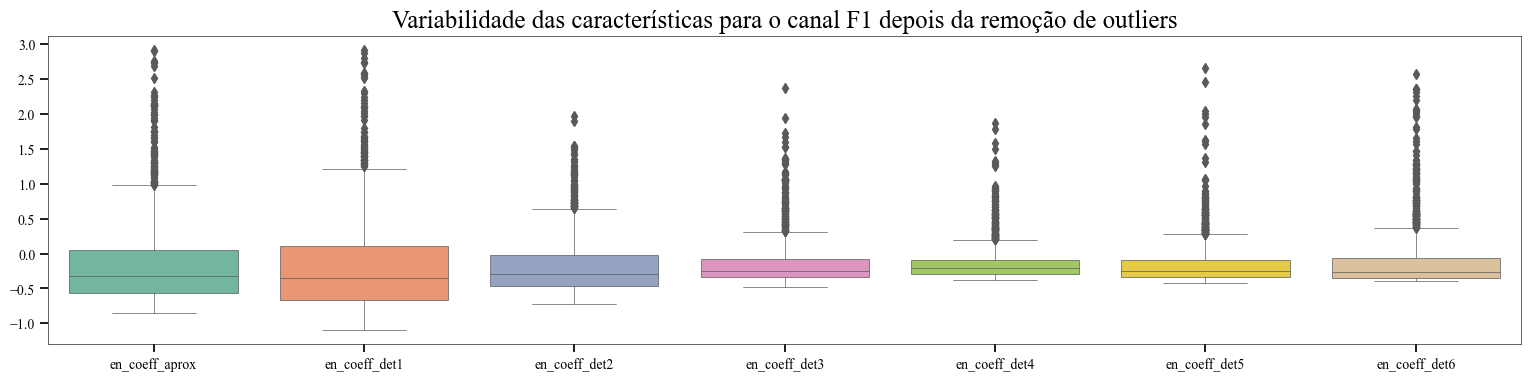

<Figure size 640x480 with 0 Axes>

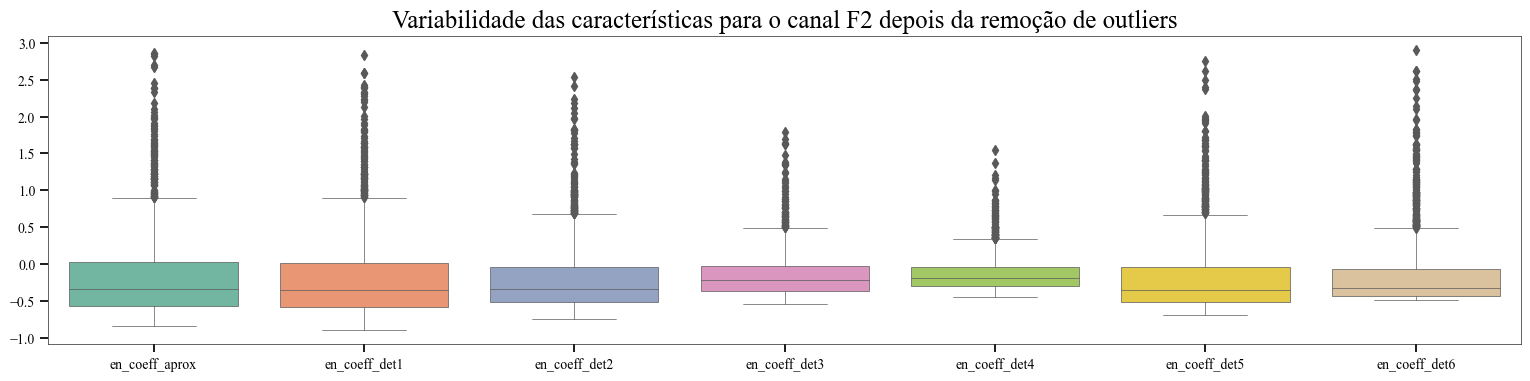

<Figure size 640x480 with 0 Axes>

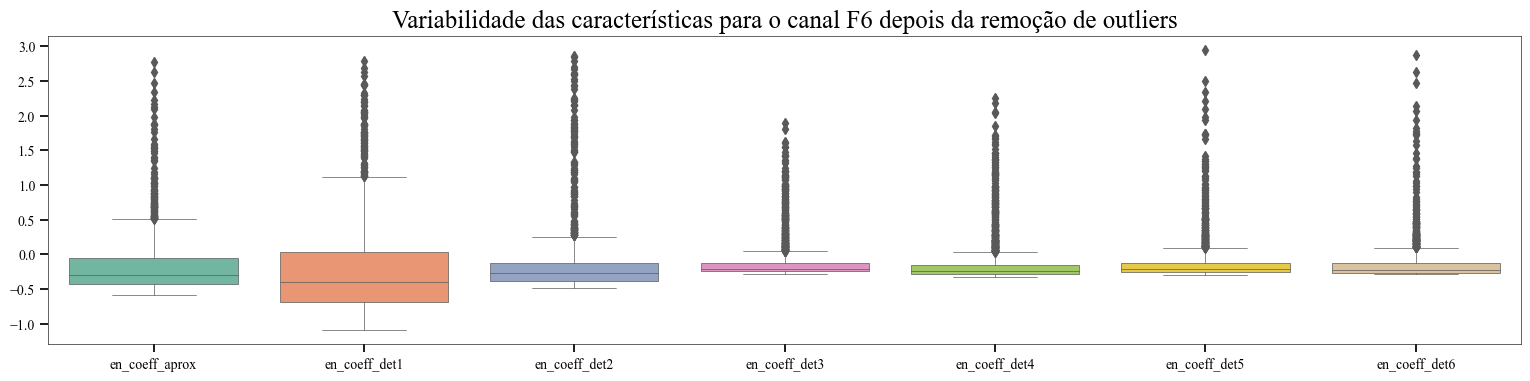

<Figure size 640x480 with 0 Axes>

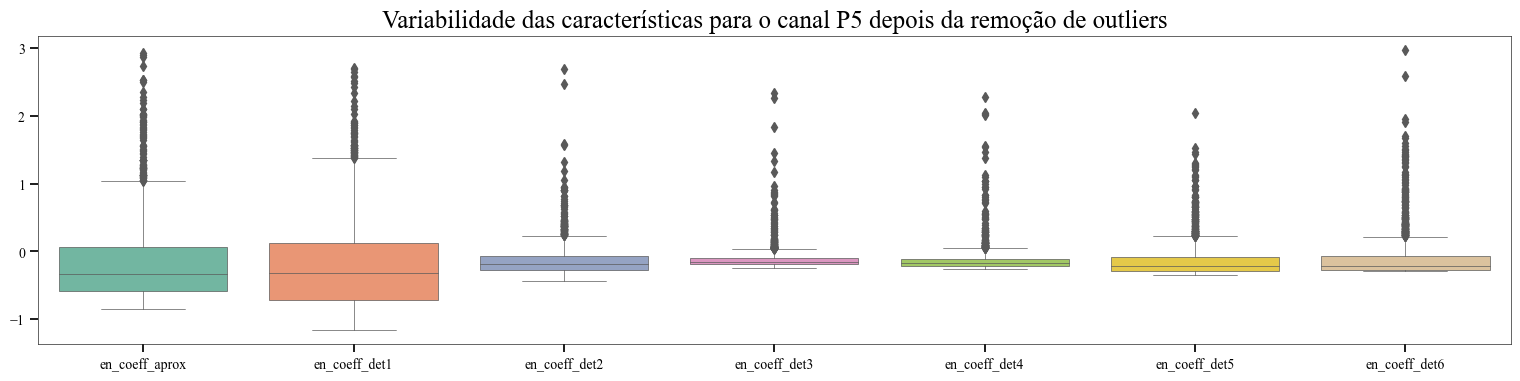

<Figure size 640x480 with 0 Axes>

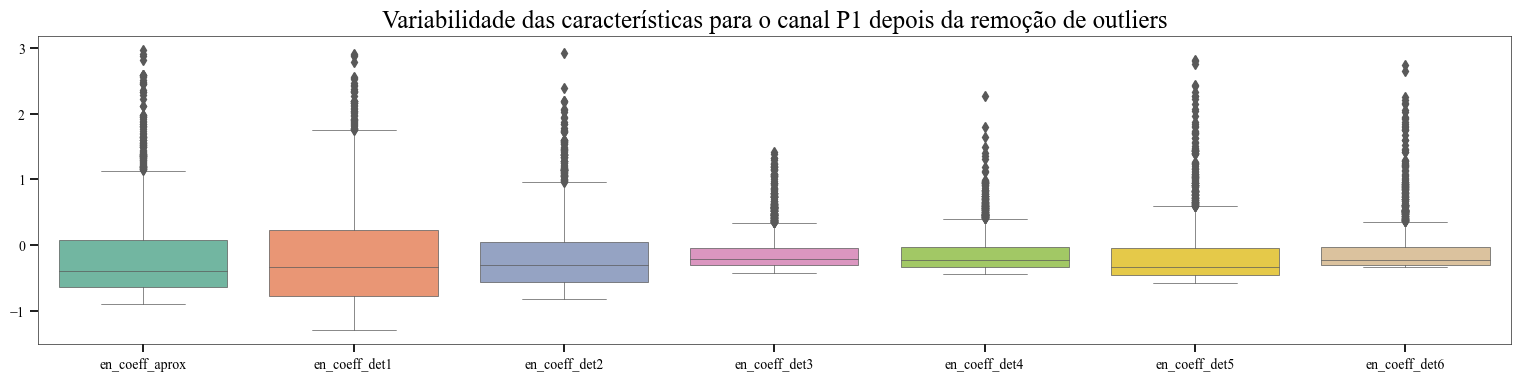

<Figure size 640x480 with 0 Axes>

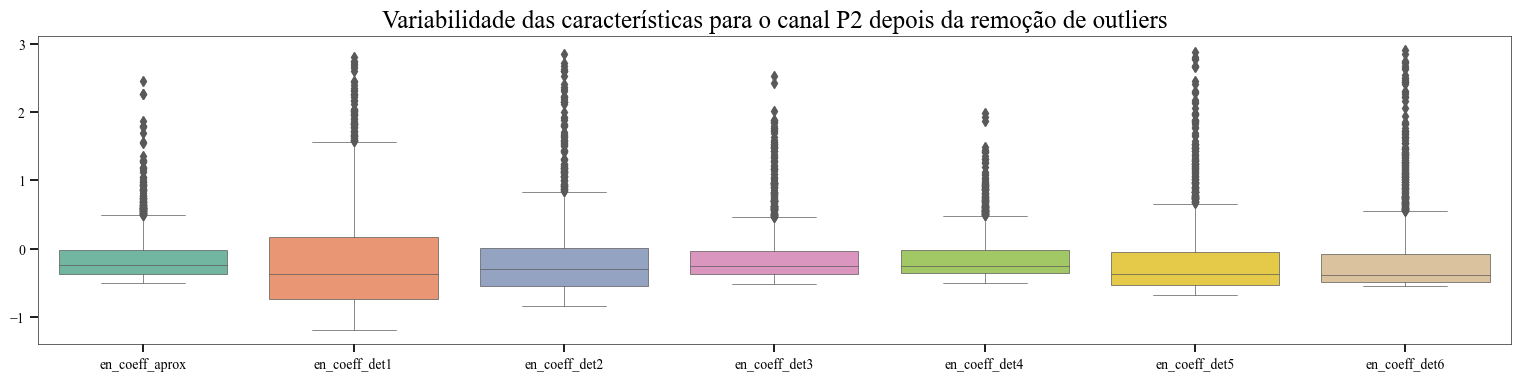

<Figure size 640x480 with 0 Axes>

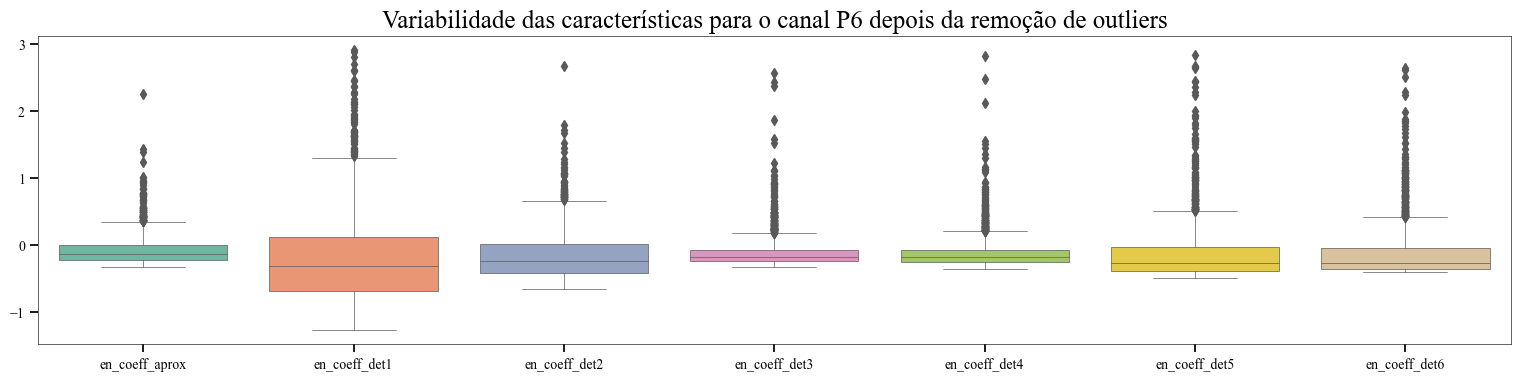

In [9]:
# visualizando outliers para cada canal
for channel in range(features_no.shape[2]):
    df = pd.DataFrame(features_no[:, :, channel], columns=wavelet_cols)
    plt.clf()
    fig5 = plt.figure(figsize=(19, 4))
    sns.boxplot(data=df, orient="v", palette="Set2", linewidth=0.5)
    plt.title('Variabilidade das características para o canal {} depois da remoção de outliers'.format(channels_name[channel]))
    plt.show()
    fig5.savefig('outputs_fig/fig5_boxplot_depois_{}.png'.format(channels_name[channel]))

#### Correlação

In [7]:
# Recuperando dados antes da remoção de outliers
features_no = features
groups_no = groups
wavelet_cols = ['en_coeff_aprox']+['en_coeff_det{}'.format(i) for i in range(1, level+1)]

<Figure size 640x480 with 0 Axes>

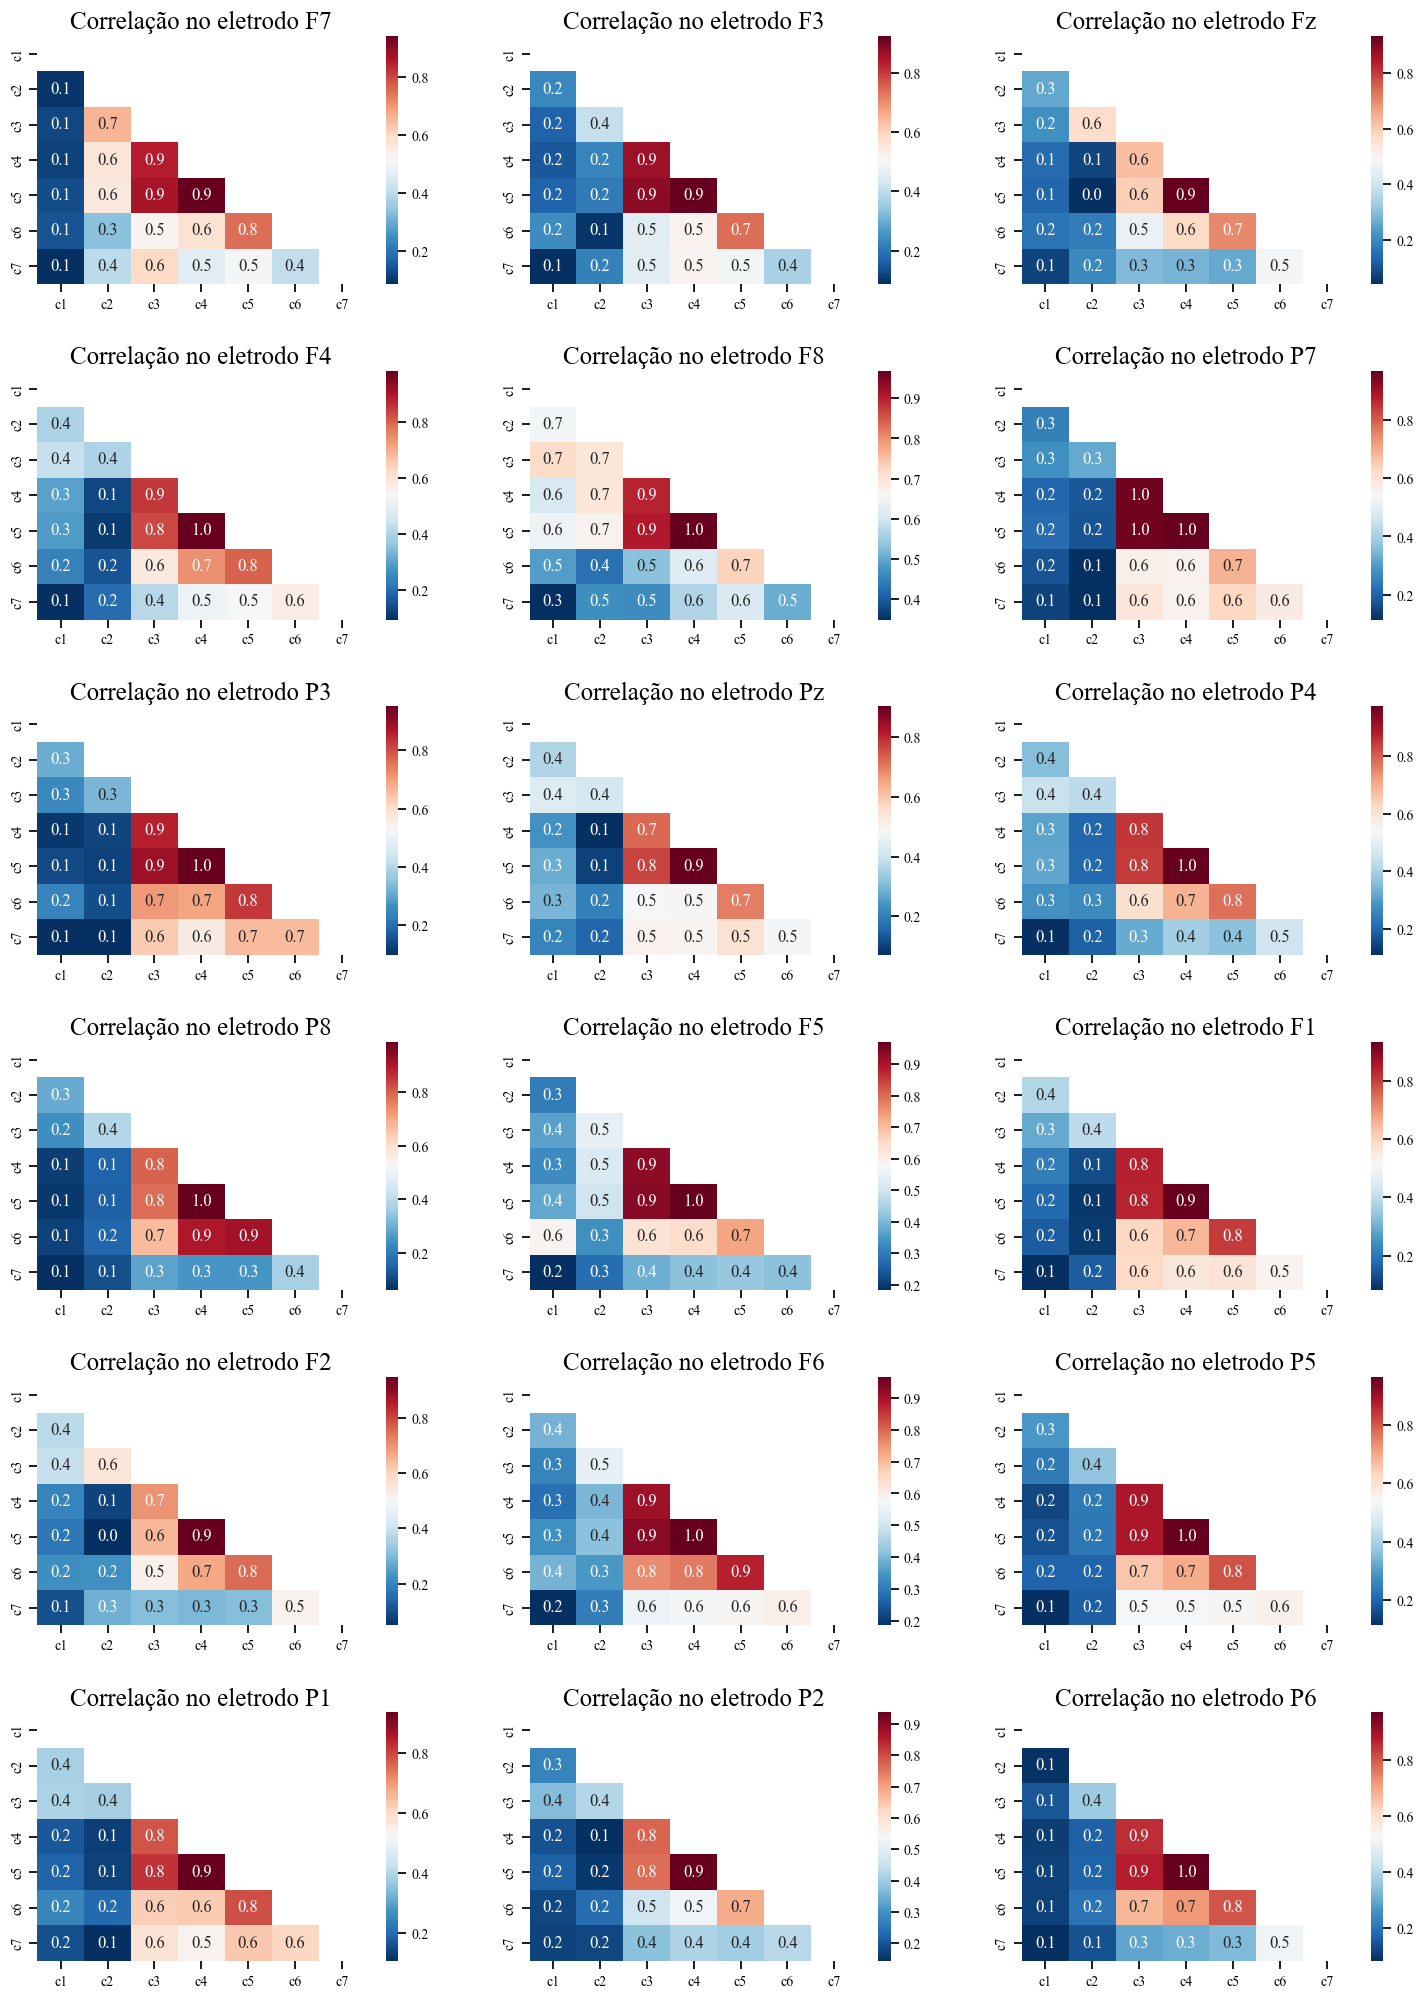

In [11]:
# Correlação de caracteríticas por eletrodo
corr_feat = []
for channel in range(features_no.shape[2]):
    df = pd.DataFrame(features_no[:, :, channel], columns=wavelet_cols)
    corr_feat.append(df.corr())

# Visualizando correlação entre as features
plt.clf()
fig6, ax = plt.subplots(nrows=6, ncols=3, figsize=(18, 25))
for channel in range(features_no.shape[2]):
    sns.heatmap(corr_feat[channel], annot=True, cmap='RdBu_r', fmt='.1f',
                xticklabels=[f'c{i}' for i in range(1, level+2)],
                yticklabels=[f'c{i}' for i in range(1, level+2)],
                ax=ax[channel//3, channel%3], mask=np.triu(corr_feat[channel]))
    ax[channel//3, channel%3].set_title(f'Correlação no eletrodo {channels_name[channel]}')
fig6.subplots_adjust(hspace=0.35)
plt.show()
fig6.savefig('outputs_fig/fig6_correlacao_features_por_canal.png')

<Figure size 640x480 with 0 Axes>

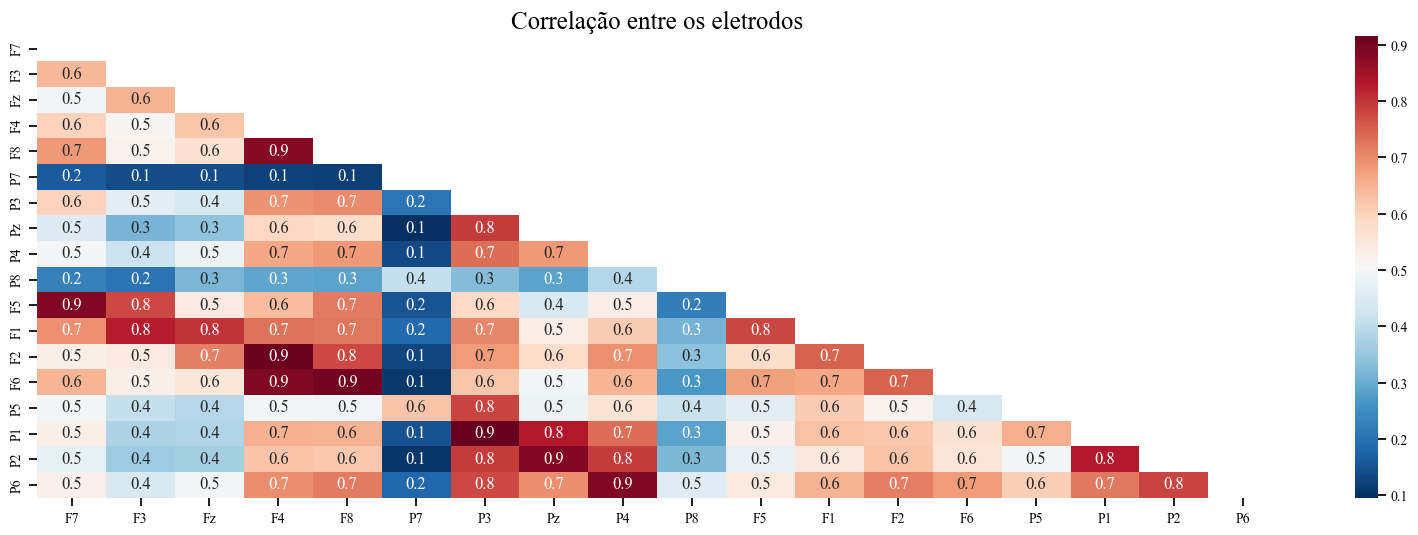

In [12]:
# Correlação entre os eletrodos
features_norm = data_norm(features_no.reshape(-1, features_no.shape[-1]), 0, 1).reshape(features_no.shape)

pca_coeffs =[[] for _ in range(features_norm.shape[0])]
for channel in range(features_norm.shape[2]):
    pca_coeffs = np.concatenate((pca_coeffs, PCA(n_components=1).fit_transform(features_norm[:, :, channel])), axis=1)

corr_ch = np.corrcoef(pca_coeffs.T)

plt.clf()
fig7 = plt.figure(figsize=(20, 6))
sns.heatmap(corr_ch, annot=True, cmap='RdBu_r', fmt='.1f', mask=np.triu(corr_ch),
            xticklabels=list(channels_name.values()), yticklabels=list(channels_name.values()))
plt.title(f'Correlação entre os eletrodos')
plt.show()
fig7.savefig('outputs_fig/fig7_correlacao_eletrodos.png')

Canais mais correlacionados: ['F7' 'F3' 'Fz' 'F4' 'F8' 'P7' 'P3' 'Pz' 'P4' 'P8' 'F5' 'F1' 'F2' 'F6'
 'P5' 'P1' 'P2' 'P6']


<Figure size 640x480 with 0 Axes>

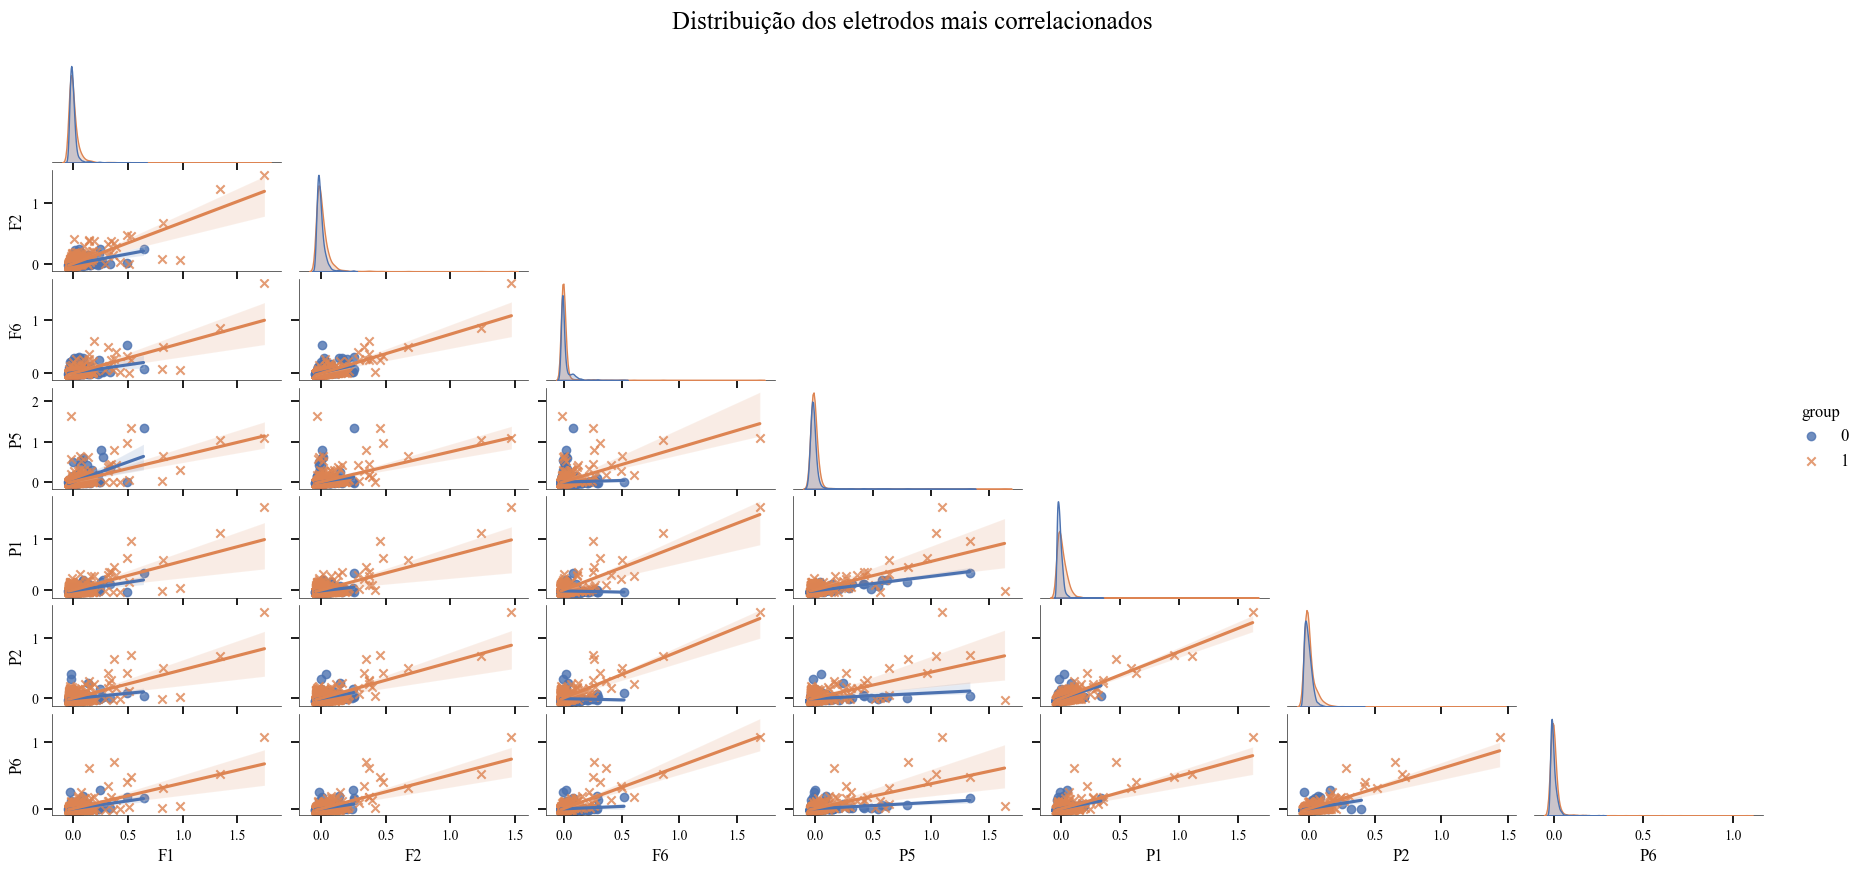

In [13]:
corr_ch = np.abs(corr_ch)
best_channels = np.array(np.where(corr_ch > 0.5))
best_channels = np.unique(best_channels)
best_channels = np.array(list(channels_name.values()))[best_channels]
print(f'Canais mais correlacionados: {best_channels}')

df_pca_coeffs = pd.DataFrame(pca_coeffs, columns=best_channels)
df_pca_coeffs['group'] = groups_no

# Visualizando distribuição de alguns dos eletrodos mais correlacionados
plt.clf()
fig8 = sns.pairplot(df_pca_coeffs, x_vars=best_channels[-7:], y_vars=best_channels[-7:], hue='group',
                    kind='reg', diag_kind='kde', corner=True, markers=["o", "x"])
fig8.figure.set_size_inches(19, 8)
fig8.figure.suptitle('Distribuição dos eletrodos mais correlacionados', y=1.05)
plt.show()
fig8.savefig('outputs_fig/fig8_distribuição_eletrodos.png')

Todos os eletrodos e caracteríticas estão correlacionados, portanto não há necessidade de remover nenhum.

#### Balanceamento

In [8]:
X_origin, y_origin = features_no.reshape(features_no.shape[0], -1), groups_no

# Sobreamostragem Synthetic Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_origin, y_origin)

# Sobreamostragem Random Oversampling (ROS)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_origin, y_origin)

# Subamostragem Random UnderSample (RUS)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_origin, y_origin)

# Subamostragem NearMiss
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X_origin, y_origin)

from collections import Counter
print('Original dataset shape   %s' % Counter(y_origin))
print('SMOTE dataset shape      %s' % Counter(y_smote))
print('ROS dataset shape        %s' % Counter(y_ros))
print('RUS dataset shape        %s' % Counter(y_rus))
print('NearMiss dataset shape   %s' % Counter(y_nm))

Original dataset shape   Counter({1: 1542, 0: 1143})
SMOTE dataset shape      Counter({1: 1542, 0: 1542})
ROS dataset shape        Counter({1: 1542, 0: 1542})
RUS dataset shape        Counter({0: 1143, 1: 1143})
NearMiss dataset shape   Counter({0: 1143, 1: 1143})


<Figure size 640x480 with 0 Axes>

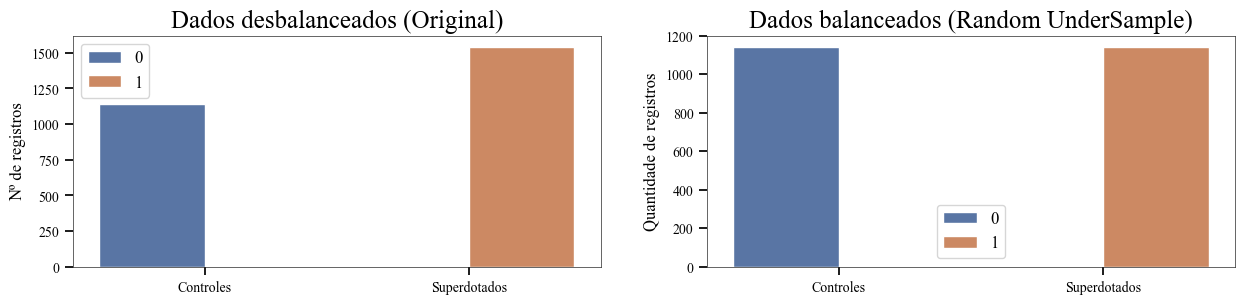

In [9]:
plt.clf()
fig9 = plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
sns.countplot(x=y_origin, hue=y_origin)
plt.title('Dados desbalanceados (Original)')
plt.xticks([0, 1], ['Controles', 'Superdotados'])
plt.ylabel('Nº de registros')
plt.subplot(1, 2, 2)
sns.countplot(x=y_rus, hue=y_rus)
plt.title('Dados balanceados (Random UnderSample)')
plt.xticks([0, 1], ['Controles', 'Superdotados'])
plt.ylabel('Quantidade de registros')
plt.show()
fig9.savefig('outputs_fig/fig9_balanceamento.png')

Como estamos trabalhando com dados de sinais de EEG não faz sentido usar técnicas de sobreamostragem, pois não podemos criar distintamente novos sinais de eletrodos e atribuir a uma pessoa.

#### Normalização

In [16]:
# Normalizar entre 0 e 1 cada feature por dimensão
X_rus_norm = data_norm(X_rus, 0, 1).reshape(X_rus.shape[0], features_no.shape[1], features_no.shape[2])
X , y = X_rus_norm.reshape(X_rus_norm.shape[0], -1), y_rus
X.shape, y.shape

# Salvar dataset
df = pd.DataFrame(X, columns=[f'{ch}_{wv}' for ch in best_channels for wv in wavelet_cols])
df['group'] = y
df.to_csv('datasets/EEG_energy_wavelets.csv', index=False)
del df

<Figure size 640x480 with 0 Axes>

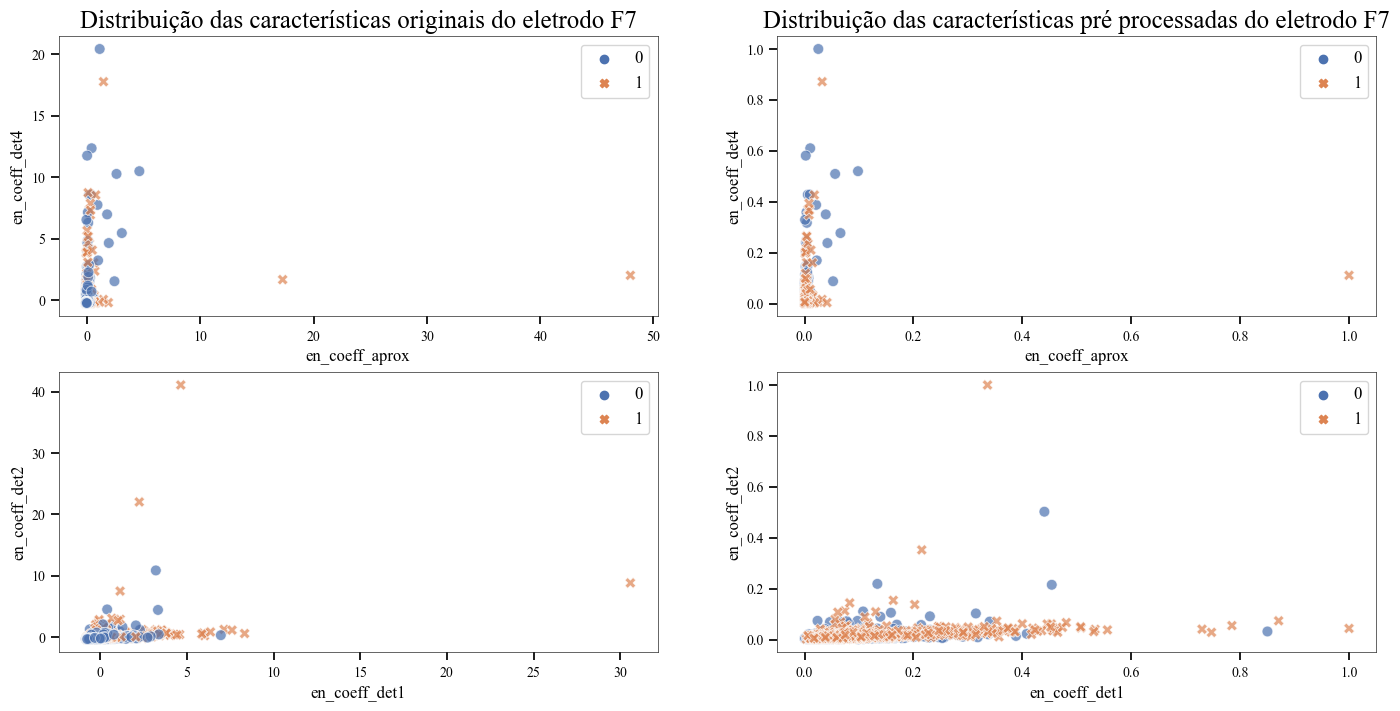

In [17]:
# Distribuição dos dados entre variáveis
plt.clf()
fig10, ax = plt.subplots(nrows=2, ncols=2, figsize=(17, 8))
sns.scatterplot(x=features_no[:, 0, 0], y=features_no[:, 4, 0], hue=groups_no, alpha=0.7, s=60, 
                style=groups_no, ax=ax[0, 0])
ax[0, 0].set_title(f'Distribuição das características originais do eletrodo {channels_name[0]}')
ax[0, 0].set_xlabel(f'en_coeff_aprox')
ax[0, 0].set_ylabel(f'en_coeff_det4')
sns.scatterplot(x=X_rus_norm[:, 0, 0], y=X_rus_norm[:, 4, 0], hue=y_rus, alpha=0.7, s=60,
                style=y_rus, ax=ax[0, 1])
ax[0, 1].set_title(f'Distribuição das características pré processadas do eletrodo {channels_name[0]}')
ax[0, 1].set_xlabel(f'en_coeff_aprox')
ax[0, 1].set_ylabel(f'en_coeff_det4')
sns.scatterplot(x=features_no[:, 1, 5], y=features_no[:, 2, 5], hue=groups_no, alpha=0.7, s=60, 
                style=groups_no, ax=ax[1, 0])
ax[1, 0].set_xlabel(f'en_coeff_det1')
ax[1, 0].set_ylabel(f'en_coeff_det2')
sns.scatterplot(x=X_rus_norm[:, 1, 5], y=X_rus_norm[:, 2, 5], hue=y_rus, alpha=0.7, s=60,
                style=y_rus, ax=ax[1, 1])
ax[1, 1].set_xlabel(f'en_coeff_det1')
ax[1, 1].set_ylabel(f'en_coeff_det2')
plt.show()
fig10.savefig('outputs_fig/fig10_distribuicao_dados_preprocessados.png')